#**Title: Near Lossless Image Compression using DCT**

Prepared by:
*   Ryan Kho Yuen Thian
*   Ong Weng Kai
*   Yong Zee Lin





<hr/>

###**For converting input image into .bmp later on**

In [1]:
!wget https://raw.githubusercontent.com/nothings/stb/master/stb_image.h
!wget https://raw.githubusercontent.com/nothings/stb/master/stb_image_write.h

--2024-10-02 16:30:54--  https://raw.githubusercontent.com/nothings/stb/master/stb_image.h
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 283010 (276K) [text/plain]
Saving to: ‘stb_image.h’

stb_image.h         100%[===================>] 276.38K  --.-KB/s    in 0.02s   

2024-10-02 16:30:54 (15.7 MB/s) - ‘stb_image.h’ saved [283010/283010]

--2024-10-02 16:30:54--  https://raw.githubusercontent.com/nothings/stb/master/stb_image_write.h
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71221 (70K) [text/plain]
Saving to: ‘stb_image_

In [2]:
%%writefile png_to_bmp.cpp
#define STB_IMAGE_IMPLEMENTATION
#define STB_IMAGE_WRITE_IMPLEMENTATION

#include "stb_image.h"
#include "stb_image_write.h"
#include <iostream>

int main(int argc, char* argv[]) {
    if (argc < 2) {
        std::cerr << "Error: Please provide the input filename.\n";
        return -1;
    }

    const char* input_filename = argv[1];

    int width, height, original_channels;

    // Load the PNG image and force it to 3 channels (RGB)
    unsigned char* img = stbi_load(input_filename, &width, &height, &original_channels, 3);
    if (img == NULL) {
        std::cerr << "Error: Unable to load image " << input_filename << "!\n";
        return -1;
    }

    std::cout << "Image loaded: " << width << "x" << height << ", " << original_channels << " original channels.\n";
    std::cout << "Image is now converted to 3 channels (RGB).\n";

    // Convert to BMP and save it
    if (stbi_write_bmp("testimg.bmp", width, height, 3, img)) {
        std::cout << "Successfully saved BMP as testimg.bmp\n";
    } else {
        std::cerr << "Error: Unable to save BMP file.\n";
    }

    // Free the image memory
    stbi_image_free(img);
    return 0;
}

Writing png_to_bmp.cpp


In [3]:
# Compile the C++ code
!g++ png_to_bmp.cpp -o png_to_bmp

## **1. Serial Code**

###**a) Accept input via upload**

In [ ]:
from google.colab import files

# Upload the image
uploaded = files.upload()
input_image = list(uploaded.keys())[0]

Saving testimg.png to testimg.png


###**b) Accept input via command line**

In [4]:
# To get the cat image from Github
!wget https://raw.githubusercontent.com/RyankTheDS/Near-Lossless-Image-Compression-using-DCT/refs/heads/main/images/testimg.png

--2024-10-02 15:34:10--  https://raw.githubusercontent.com/RyankTheDS/Near-Lossless-Image-Compression-using-DCT/refs/heads/main/images/testimg.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 790297 (772K) [image/png]
Saving to: ‘testimg.png’

testimg.png         100%[===================>] 771.77K  --.-KB/s    in 0.009s  

2024-10-02 15:34:10 (87.1 MB/s) - ‘testimg.png’ saved [790297/790297]



In [4]:
# To get the dark image from Github
!wget -O testimg.png https://raw.githubusercontent.com/RyankTheDS/Near-Lossless-Image-Compression-using-DCT/refs/heads/main/images/dark.png

--2024-10-02 15:56:55--  https://raw.githubusercontent.com/RyankTheDS/Near-Lossless-Image-Compression-using-DCT/refs/heads/main/images/dark.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 820175 (801K) [image/png]
Saving to: ‘testimg.png’

testimg.png         100%[===================>] 800.95K  --.-KB/s    in 0.008s  

2024-10-02 15:56:56 (100 MB/s) - ‘testimg.png’ saved [820175/820175]



In [1]:
# To get the NASA image from NASA directly (Way 1)
!wget -O testimg.png https://svs.gsfc.nasa.gov/vis/a030000/a030000/a030028/frames/6750x3375_2x1_30p/split-750m/dnb_land_ocean_ice.2012.13500x13500.A1-0000.png

--2024-10-02 15:22:44--  https://svs.gsfc.nasa.gov/vis/a030000/a030000/a030028/frames/6750x3375_2x1_30p/split-750m/dnb_land_ocean_ice.2012.13500x13500.A1-0000.png
Resolving svs.gsfc.nasa.gov (svs.gsfc.nasa.gov)... 169.154.143.10, 2001:4d0:2418:143::10
Connecting to svs.gsfc.nasa.gov (svs.gsfc.nasa.gov)|169.154.143.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3098913 (3.0M) [image/png]
Saving to: ‘testimg.png’

testimg.png         100%[===================>]   2.96M  13.3MB/s    in 0.2s    

2024-10-02 15:22:45 (13.3 MB/s) - ‘testimg.png’ saved [3098913/3098913]



In [4]:
# To get the NASA image from Github (Way 2)
!wget -O testimg.png https://raw.githubusercontent.com/RyankTheDS/Near-Lossless-Image-Compression-using-DCT/refs/heads/main/images/dnb_land_ocean_ice.2012.13500x13500.A1-0000.png

--2024-10-02 16:31:12--  https://raw.githubusercontent.com/RyankTheDS/Near-Lossless-Image-Compression-using-DCT/refs/heads/main/images/dnb_land_ocean_ice.2012.13500x13500.A1-0000.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3098913 (3.0M) [image/png]
Saving to: ‘testimg.png’

testimg.png         100%[===================>]   2.96M  --.-KB/s    in 0.03s   

2024-10-02 16:31:13 (99.2 MB/s) - ‘testimg.png’ saved [3098913/3098913]



###**c) For Comparing Images in terms of MSE and SSIM (verification code)**

In [5]:
%%writefile compare_images.cpp
#include <opencv2/opencv.hpp>
#include <opencv2/core.hpp>
#include <opencv2/imgproc.hpp>
#include <opencv2/highgui.hpp>
#include <opencv2/imgcodecs.hpp>
#include <iostream>
#include <cmath>

using namespace cv;
using namespace std;

// Function to compute Mean Squared Error (MSE)
double computeMSE(const Mat& img1, const Mat& img2) {
    Mat s1;
    absdiff(img1, img2, s1);  // absolute difference
    s1.convertTo(s1, CV_32F);  // convert to float

    s1 = s1.mul(s1);  // square

    Scalar s = sum(s1);  // sum all pixels

    double mse = (s[0] + s[1] + s[2]) / (double)(img1.channels() * img1.total());
    return mse;
}

// Function to compute SSIM
Scalar computeSSIM(const Mat& img1, const Mat& img2) {
    const double C1 = 6.5025, C2 = 58.5225;
    Mat I1, I2;
    img1.convertTo(I1, CV_32F);  // convert to float
    img2.convertTo(I2, CV_32F);

    Mat I1_2 = I1.mul(I1);  // I1^2
    Mat I2_2 = I2.mul(I2);  // I2^2
    Mat I1_I2 = I1.mul(I2);  // I1 * I2

    Mat mu1, mu2;
    GaussianBlur(I1, mu1, Size(11, 11), 1.5);
    GaussianBlur(I2, mu2, Size(11, 11), 1.5);

    Mat mu1_2 = mu1.mul(mu1);
    Mat mu2_2 = mu2.mul(mu2);
    Mat mu1_mu2 = mu1.mul(mu2);

    Mat sigma1_2, sigma2_2, sigma12;
    GaussianBlur(I1_2, sigma1_2, Size(11, 11), 1.5);
    GaussianBlur(I2_2, sigma2_2, Size(11, 11), 1.5);
    GaussianBlur(I1_I2, sigma12, Size(11, 11), 1.5);

    sigma1_2 -= mu1_2;
    sigma2_2 -= mu2_2;
    sigma12 -= mu1_mu2;

    Mat t1, t2, t3;
    t1 = 2 * mu1_mu2 + C1;
    t2 = 2 * sigma12 + C2;
    t3 = t1.mul(t2);  // t3 = (2*mu1_mu2 + C1).*(2*sigma12 + C2)

    t1 = mu1_2 + mu2_2 + C1;
    t2 = sigma1_2 + sigma2_2 + C2;
    t1 = t1.mul(t2);  // t1 = (mu1_2 + mu2_2 + C1).*(sigma1_2 + sigma2_2 + C2)

    Mat ssim_map;
    divide(t3, t1, ssim_map);  // ssim_map = t3 ./ t1
    Scalar mssim = mean(ssim_map);  // mssim = average of ssim map
    return mssim;
}

int main(int argc, char** argv) {
    if (argc != 3) {
        cout << "Usage: ./compare_images <image1> <image2>" << endl;
        return -1;
    }

    Mat img1 = imread(argv[1], IMREAD_COLOR);
    Mat img2 = imread(argv[2], IMREAD_COLOR);

    if (img1.empty() || img2.empty()) {
        cout << "Could not open or find the images." << endl;
        return -1;
    }

    // Compute MSE
    double mse = computeMSE(img1, img2);
    cout << "MSE: " << mse << endl;

    // Compute SSIM
    Scalar ssim = computeSSIM(img1, img2);
    cout << "SSIM: " << ssim[0] << endl;

    return 0;
}

Writing compare_images.cpp


In [6]:
!g++ compare_images.cpp -o compare_images `pkg-config --cflags --libs opencv4`

###**d) Compression and Decompression Code**

In [7]:
%%writefile compress_image.cpp
#include <opencv2/opencv.hpp>
#include <opencv2/imgcodecs.hpp>
#include <opencv2/highgui.hpp>
#include <iostream>
#include <vector>
#include <fstream>
#include <chrono>
#include <cmath>
#include <map>
#include <cstdlib>
#include <filesystem>
#define M_PI 3.14159265358979323846

using namespace cv;
using namespace std;
using namespace std::chrono;

// Function to perform 2D DCT
void dct2(const Mat& src, Mat& dst) {
    int M = src.rows;
    int N = src.cols;
    dst.create(M, N, CV_64F);

    for (int u = 0; u < M; ++u) {
        for (int v = 0; v < N; ++v) {
            double sum = 0.0;
            for (int x = 0; x < M; ++x) {
                for (int y = 0; y < N; ++y) {
                    double cosX = cos(M_PI / M * (x + 0.5) * u);
                    double cosY = cos(M_PI / N * (y + 0.5) * v);
                    sum += src.at<double>(x, y) * cosX * cosY;
                }
            }
            double C_u = (u == 0) ? sqrt(1.0 / M) : sqrt(2.0 / M);
            double C_v = (v == 0) ? sqrt(1.0 / N) : sqrt(2.0 / N);
            dst.at<double>(u, v) = round(C_u * C_v * sum * 10) / 10.0; // Truncate to 1 decimal place
        }
    }
}

// Function to perform 2D IDCT
void idct2(const Mat& src, Mat& dst) {
    int M = src.rows;
    int N = src.cols;
    dst.create(M, N, CV_64F);

    for (int x = 0; x < M; ++x) {
        for (int y = 0; y < N; ++y) {
            double sum = 0.0;
            for (int u = 0; u < M; ++u) {
                for (int v = 0; v < N; ++v) {
                    double C_u = (u == 0) ? sqrt(1.0 / M) : sqrt(2.0 / M);
                    double C_v = (v == 0) ? sqrt(1.0 / N) : sqrt(2.0 / N);
                    double cosX = cos(M_PI / M * (x + 0.5) * u);
                    double cosY = cos(M_PI / N * (y + 0.5) * v);
                    sum += C_u * C_v * src.at<double>(u, v) * cosX * cosY;
                }
            }
            dst.at<double>(x, y) = sum;
        }
    }
}

// Zig-Zag scan function
vector<double> zigzagScan(const Mat& block) {
    int n = block.rows;
    vector<double> result;
    result.reserve(n * n);
    for (int i = 0; i < 2 * n - 1; ++i) {
        if (i % 2 == 0) {
            for (int j = 0; j <= i; ++j) {
                if (j < n && (i - j) < n) {
                    result.push_back(block.at<double>(j, i - j));
                }
            }
        } else {
            for (int j = 0; j <= i; ++j) {
                if (j < n && (i - j) < n) {
                    result.push_back(block.at<double>(i - j, j));
                }
            }
        }
    }
    return result;
}

// RLE encoding function
vector<pair<double, int>> rleEncode(const vector<double>& data) {
    vector<pair<double, int>> encodedData;
    int count = 1;
    double current = data[0];
    for (size_t i = 1; i < data.size(); ++i) {
        if (data[i] == current) {
            count++;
        } else {
            encodedData.push_back({current, count});
            current = data[i];
            count = 1;
        }
    }
    encodedData.push_back({current, count});
    return encodedData;
}

// RLE decoding function
vector<double> rleDecode(const vector<pair<double, int>>& encodedData) {
    vector<double> decodedData;
    for (const auto& elem : encodedData) {
        decodedData.insert(decodedData.end(), elem.second, elem.first);
    }
    return decodedData;
}


void compressImage(const Mat& src, const string& filename) {
    // Clone the input image for processing
    Mat dst = src.clone();

    // Open the .bin file for writing
    ofstream rleFile(filename, ios::out | ios::binary);
    if (!rleFile.is_open()) {
        cerr << "Error opening file for writing: " << filename << endl;
        return;
    }

    // Iterate through the image in 8x8 blocks
    for (int y = 0; y < src.rows; y += 8) {
        for (int x = 0; x < src.cols; x += 8) {
            int blockWidth = min(8, src.cols - x);
            int blockHeight = min(8, src.rows - y);

            Mat block = src(Rect(x, y, blockWidth, blockHeight));
            Mat dctBlock;
            dct2(block, dctBlock);

            // Perform Zig-Zag scanning and RLE encoding
            vector<double> zigzagged = zigzagScan(dctBlock);
            vector<pair<double, int>> rleEncoded = rleEncode(zigzagged);

            // Write the RLE-encoded data to the .bin file
            for (const auto& pair : rleEncoded) {
                // Convert the DCT coefficient to int16_t to save space
                int16_t quantizedValue = static_cast<int16_t>(round(pair.first));
                // Store the count as uint8_t (assuming counts fit in this range)
                uint8_t quantizedCount = static_cast<uint8_t>(min(pair.second, 255));  // Limit count to 255

                // Write the quantized value and count to the file
                rleFile.write(reinterpret_cast<const char*>(&quantizedValue), sizeof(quantizedValue));
                rleFile.write(reinterpret_cast<const char*>(&quantizedCount), sizeof(quantizedCount));
            }
        }
    }

    // Close the .bin file after writing
    rleFile.close();
    cout << "Compression complete. Data saved " << endl;
}

void decompressImage(Mat& dst, const string& filename, int rows, int cols) {
    // Open the .bin file for reading
    ifstream rleFile(filename, ios::in | ios::binary);
    if (!rleFile.is_open()) {
        cerr << "Error opening file for reading: " << filename << endl;
        return;
    }

    dst = Mat::zeros(rows, cols, CV_64F);  // Initialize the output image

    // Iterate through the image in 8x8 blocks
    for (int y = 0; y < rows; y += 8) {
        for (int x = 0; x < cols; x += 8) {
            int blockWidth = min(8, cols - x);
            int blockHeight = min(8, rows - y);

            // Read the RLE-encoded data from the .bin file for the current block
            vector<pair<double, int>> rleEncoded;
            int totalElements = blockWidth * blockHeight;
            int countElements = 0;

            while (countElements < totalElements && rleFile.good()) {
                int16_t value;      // Read value as int16_t
                uint8_t count;      // Read count as uint8_t

                rleFile.read(reinterpret_cast<char*>(&value), sizeof(value));
                rleFile.read(reinterpret_cast<char*>(&count), sizeof(count));

                if (rleFile.gcount() == 0) break;  // Break at EOF

                rleEncoded.push_back({static_cast<double>(value), static_cast<int>(count)});
                countElements += count;  // Update the count of elements read
            }

            // Decode RLE and reverse Zig-Zag for reconstruction
            vector<double> decodedZigzag = rleDecode(rleEncoded);
            Mat reconstructedBlock = Mat::zeros(blockHeight, blockWidth, CV_64F);
            int index = 0;

            for (int i = 0; i < 2 * blockWidth - 1; ++i) {
                if (i % 2 == 0) {
                    for (int j = 0; j <= i; ++j) {
                        if (j < blockWidth && (i - j) < blockHeight) {
                            reconstructedBlock.at<double>(j, i - j) = decodedZigzag[index++];
                        }
                    }
                } else {
                    for (int j = 0; j <= i; ++j) {
                        if (j < blockWidth && (i - j) < blockHeight) {
                            reconstructedBlock.at<double>(i - j, j) = decodedZigzag[index++];
                        }
                    }
                }
            }

            // Apply inverse DCT to the block and copy to the destination image
            Mat idctBlock;
            idct2(reconstructedBlock, idctBlock);
            idctBlock.copyTo(dst(Rect(x, y, blockWidth, blockHeight)));
        }
    }

    // Close the .bin file after reading
    rleFile.close();

    cout << "Decompression complete. Image reconstructed." << endl;
}


void processImage(const Mat& src, Mat& dst, const string& filename) {
    compressImage(src, filename);
    decompressImage(dst, filename, src.rows, src.cols);
}



void splitImage(const cv::Mat& image, std::vector<cv::Mat>& channels) {
    int rows = image.rows;
    int cols = image.cols;
    int numChannels = image.channels();

    // Resize vector to hold all channels
    channels.resize(numChannels);

    // Initialize each channel as a single-channel matrix with the same dimensions as the input image
    for (int ch = 0; ch < numChannels; ++ch) {
        channels[ch] = cv::Mat(rows, cols, CV_8UC1);
    }

    // Iterate over the image and split the channels manually
    for (int r = 0; r < rows; ++r) {
        for (int c = 0; c < cols; ++c) {
            // Get pixel value (multi-channel pixel)
            cv::Vec3b pixel = image.at<cv::Vec3b>(r, c);
            // Assign each channel its corresponding value
            for (int ch = 0; ch < numChannels; ++ch) {
                channels[ch].at<uchar>(r, c) = pixel[ch];
            }
        }
    }
}

// Function to merge multiple single-channel images into a multi-channel image
void mergeImage(cv::Mat* channels, int numChannels, cv::Mat& mergedImage) {
    // Check if the number of channels matches the input
    if (numChannels <= 0 || !channels) {
        cerr << "Invalid number of channels or null channels pointer" << endl;
        return;
    }

    // Get the size from the first channel
    int rows = channels[0].rows;
    int cols = channels[0].cols;

    // Initialize the merged image with the same size as the input channels
    mergedImage.create(rows, cols, CV_MAKETYPE(CV_8U, numChannels));  // Create image with the appropriate number of channels

    // Iterate over each pixel and assign values to the merged image
    for (int r = 0; r < rows; ++r) {
        for (int c = 0; c < cols; ++c) {
            Vec<uchar, 3> pixel;  // Change to Vec<uchar, numChannels> if numChannels > 3
            for (int ch = 0; ch < numChannels; ++ch) {
                pixel[ch] = channels[ch].at<uchar>(r, c);
            }
            mergedImage.at<Vec<uchar, 3>>(r, c) = pixel;  // Assign pixel value
        }
    }
}


int main(int argc, char** argv) {
    if (argc < 2) {
        cerr << "Usage: " << argv[0] << " <input_image_filename>" << endl;
        return -1;
    }

    string inputFilename = argv[1];

    auto start = high_resolution_clock::now();
    // Read the image
    Mat img = imread(inputFilename, IMREAD_COLOR);
    if (img.empty()) {
        cerr << "Error loading image!" << endl;
        return -1;
    }

    // Pad image to the nearest multiple of 8
    int paddedRows = (img.rows + 7) & ~7;
    int paddedCols = (img.cols + 7) & ~7;
    Mat paddedImg;
    copyMakeBorder(img, paddedImg, 0, paddedRows - img.rows, 0, paddedCols - img.cols, BORDER_CONSTANT, Scalar::all(0));

    // Split image into channels
    vector<Mat> channels(3);
    //split(paddedImg, channels);
    splitImage(paddedImg, channels);

    Mat processed[3];
    for (int i = 0; i < 3; ++i) {
        Mat imgChannel;
        channels[i].convertTo(imgChannel, CV_64F);

        // Create .rle file for each channel
        string rleFilename = "channel_" + to_string(i) + ".bin";
        //processImage(imgChannel, processed[i]);
        processImage(imgChannel, processed[i], rleFilename);
        processed[i].convertTo(processed[i], CV_8U);
    }

    Mat decompressedImg;

    mergeImage(processed, 3, decompressedImg);

    // Crop the padded borders
    decompressedImg = decompressedImg(Rect(0, 0, img.cols, img.rows));
    imwrite("serial_output.bmp", decompressedImg);

    auto stop = high_resolution_clock::now();
    auto duration = duration_cast<milliseconds>(stop - start);
    // Print the size of the compressed image
    std::ifstream file("serial_output.bmp", std::ifstream::ate | std::ifstream::binary);
    double size = static_cast<double>(file.tellg()) / 1024;
    cout << "Returned image size: " << size << " KB" << endl;
    cout << "Time taken: " << duration.count() << " milliseconds" << endl;

    // Save the execution time to a CSV file in the /content/ directory
    ofstream timeFile;
    timeFile.open("/content/compression_times.csv", ios::out);
    if (timeFile.is_open()) {
        timeFile << "Serial," << duration.count() << "\n";  // Label this method as "Serial"
        timeFile.close();
    } else {
        cerr << "Unable to open file for writing!" << endl;
    }

    vector<string> filenames = {"channel_0.bin", "channel_1.bin", "channel_2.bin"};

    for (const auto& filename : filenames) {
        string xzFilename = filename + ".xz";

        // Check if the .xz file exists and remove it if it does
        if (std::filesystem::exists(xzFilename)) {
            // Remove the existing .xz file to replace it
            string removeCommand = "rm " + xzFilename;
            system(removeCommand.c_str());
        }

        // Compress the .bin file using system command to generate .xz file
        string compressCommand = "xz " + filename;
        int result = system(compressCommand.c_str());
        if (result != 0) {
            cerr << "Error compressing file to .xz format." << endl;
        }
    }

    // Remove the .bin files
    for (const auto& filename : filenames) {
        remove(filename.c_str());
    }

    return 0;
}


Writing compress_image.cpp


In [8]:
!g++ -o compress_image compress_image.cpp `pkg-config --cflags --libs opencv4`

In [9]:
# For converting input image to bmp
# Run the compiled program
!./png_to_bmp testimg.png
#!./png_to_bmp dark.png

Image loaded: 6750x3375, 3 original channels.
Image is now converted to 3 channels (RGB).
Successfully saved BMP as testimg.bmp


###**e) Time taken to encode and decode**

In [10]:
# Run the C++ executable
!./compress_image testimg.bmp

Compression complete. Data saved 
Decompression complete. Image reconstructed.
Compression complete. Data saved 
Decompression complete. Image reconstructed.
Compression complete. Data saved 
Decompression complete. Image reconstructed.
Returned image size: 66748.6 KB
Time taken: 398787 milliseconds


###**f) Appearance of Images**

Please enter the original image filename: testimg.bmp


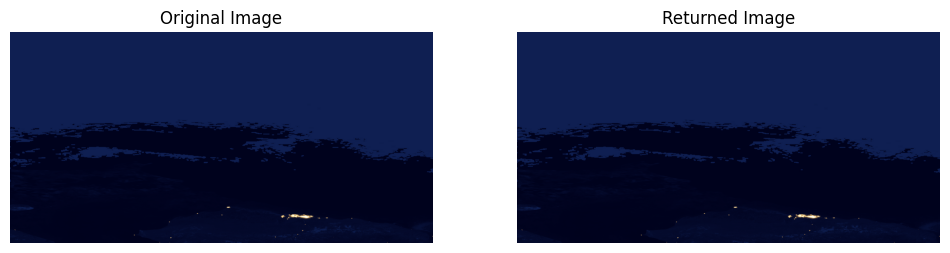

Original image size: 68350554 bytes
Returned image size: 68350554 bytes


In [11]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Display the original image
original_image = input("Please enter the original image filename: ")
original_img = Image.open(original_image)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title('Original Image')
plt.axis('off')

# Display the returned image
decompressed_img = Image.open('serial_output.bmp')
plt.subplot(1, 2, 2)
plt.imshow(decompressed_img)
plt.title('Returned Image')
plt.axis('off')

plt.show()

# Print the size of the original and returned images
original_file_size = os.path.getsize(original_image)
decompressed_file_size = os.path.getsize('serial_output.bmp')
print(f"Original image size: {original_file_size} bytes")
print(f"Returned image size: {decompressed_file_size} bytes")

###**g) Compare similarity and sizes of Images**

In [12]:
!./compare_images testimg.bmp serial_output.bmp

MSE: 0.0155246
[ WARN:0] global ./modules/core/src/matrix_expressions.cpp (1333) assign OpenCV/MatExpr: processing of multi-channel arrays might be changed in the future: https://github.com/opencv/opencv/issues/16739
[ WARN:0] global ./modules/core/src/matrix_expressions.cpp (1325) assign OpenCV/MatExpr: processing of multi-channel arrays might be changed in the future: https://github.com/opencv/opencv/issues/16739
SSIM: 0.999729


In [13]:
%%writefile compare_file_sizes.cpp
#include <iostream>
#include <filesystem>
#include <string>

int main() {
    std::string prefix = "channel_";
    std::string dfile = "testimg.bmp";
    long totalCompressedSize = 0;

    // Iterate through the current directory to find relevant files
    for (const auto& entry : std::filesystem::directory_iterator(".")) {
        if (entry.is_regular_file()) {
            std::string filename = entry.path().filename().string();
            // Check if the filename starts with the prefix "channel_"
            if (filename.rfind(prefix, 0) == 0) {  // Matches files like "channel_x.bin.xz"
                totalCompressedSize += std::filesystem::file_size(entry.path());
            }
        }
    }

    // Get the size of the decompressed output file
    long originalSize = std::filesystem::file_size(dfile);

    // Output the sizes
    std::cout << "Size of compressed: " << totalCompressedSize << " bytes\n";
    std::cout << "Size of original: " << originalSize << " bytes\n";

    // Calculate the compression ratio
    double compressionRatio = static_cast<double>(originalSize) / totalCompressedSize;
    std::cout << "Compression Ratio: " << compressionRatio << ":1\n";

    return 0;
}


Writing compare_file_sizes.cpp


In [14]:
!g++ compare_file_sizes.cpp -o compare_file_sizes
!./compare_file_sizes

Size of compressed: 5591512 bytes
Size of original: 68350554 bytes
Compression Ratio: 12.224:1


<hr/>

## **2. OpenMP Code**

###**a) Accept input via Upload**

In [ ]:
from google.colab import files

# Upload the image
uploaded = files.upload()
input_image = list(uploaded.keys())[0]

Saving testimg.png to testimg.png


###**b) Accept input via Command Line**

In [ ]:
# To get the cat image from Github
!wget https://raw.githubusercontent.com/RyankTheDS/Near-Lossless-Image-Compression-using-DCT/refs/heads/main/images/testimg.png

--2024-09-14 04:12:41--  https://svs.gsfc.nasa.gov/vis/a020000/a020200/a020255/frames/3840x2160_16x9_60p/Shot48/Shot48Frames/Shot48.00000.png
Resolving svs.gsfc.nasa.gov (svs.gsfc.nasa.gov)... 169.154.143.10, 2001:4d0:2418:143::10
Connecting to svs.gsfc.nasa.gov (svs.gsfc.nasa.gov)|169.154.143.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11402446 (11M) [image/png]
Saving to: ‘input_image.png’

input_image.png     100%[===================>]  10.87M  4.40MB/s    in 2.5s    

2024-09-14 04:12:44 (4.40 MB/s) - ‘input_image.png’ saved [11402446/11402446]



In [ ]:
# To get the dark image from Github
!wget -O testimg.png https://raw.githubusercontent.com/RyankTheDS/Near-Lossless-Image-Compression-using-DCT/refs/heads/main/images/dark.png

In [ ]:
# To get the NASA image from NASA directly (Way 1)
!wget -O testimg.png https://svs.gsfc.nasa.gov/vis/a030000/a030000/a030028/frames/6750x3375_2x1_30p/split-750m/dnb_land_ocean_ice.2012.13500x13500.A1-0000.png

In [ ]:
# To get the NASA image from Github (Way 2)
!wget -O testimg.png https://raw.githubusercontent.com/RyankTheDS/Near-Lossless-Image-Compression-using-DCT/refs/heads/main/images/dnb_land_ocean_ice.2012.13500x13500.A1-0000.png

###**c) For Comparing Images in terms of MSE and SSIM (verification code)**

In [ ]:
%%writefile compare_images.cpp
#include <opencv2/opencv.hpp>
#include <opencv2/core.hpp>
#include <opencv2/imgproc.hpp>
#include <opencv2/highgui.hpp>
#include <opencv2/imgcodecs.hpp>
#include <iostream>
#include <cmath>

using namespace cv;
using namespace std;

// Function to compute Mean Squared Error (MSE)
double computeMSE(const Mat& img1, const Mat& img2) {
    Mat s1;
    absdiff(img1, img2, s1);  // absolute difference
    s1.convertTo(s1, CV_32F);  // convert to float

    s1 = s1.mul(s1);  // square

    Scalar s = sum(s1);  // sum all pixels

    double mse = (s[0] + s[1] + s[2]) / (double)(img1.channels() * img1.total());
    return mse;
}

// Function to compute SSIM
Scalar computeSSIM(const Mat& img1, const Mat& img2) {
    const double C1 = 6.5025, C2 = 58.5225;
    Mat I1, I2;
    img1.convertTo(I1, CV_32F);  // convert to float
    img2.convertTo(I2, CV_32F);

    Mat I1_2 = I1.mul(I1);  // I1^2
    Mat I2_2 = I2.mul(I2);  // I2^2
    Mat I1_I2 = I1.mul(I2);  // I1 * I2

    Mat mu1, mu2;
    GaussianBlur(I1, mu1, Size(11, 11), 1.5);
    GaussianBlur(I2, mu2, Size(11, 11), 1.5);

    Mat mu1_2 = mu1.mul(mu1);
    Mat mu2_2 = mu2.mul(mu2);
    Mat mu1_mu2 = mu1.mul(mu2);

    Mat sigma1_2, sigma2_2, sigma12;
    GaussianBlur(I1_2, sigma1_2, Size(11, 11), 1.5);
    GaussianBlur(I2_2, sigma2_2, Size(11, 11), 1.5);
    GaussianBlur(I1_I2, sigma12, Size(11, 11), 1.5);

    sigma1_2 -= mu1_2;
    sigma2_2 -= mu2_2;
    sigma12 -= mu1_mu2;

    Mat t1, t2, t3;
    t1 = 2 * mu1_mu2 + C1;
    t2 = 2 * sigma12 + C2;
    t3 = t1.mul(t2);  // t3 = (2*mu1_mu2 + C1).*(2*sigma12 + C2)

    t1 = mu1_2 + mu2_2 + C1;
    t2 = sigma1_2 + sigma2_2 + C2;
    t1 = t1.mul(t2);  // t1 = (mu1_2 + mu2_2 + C1).*(sigma1_2 + sigma2_2 + C2)

    Mat ssim_map;
    divide(t3, t1, ssim_map);  // ssim_map = t3 ./ t1
    Scalar mssim = mean(ssim_map);  // mssim = average of ssim map
    return mssim;
}

int main(int argc, char** argv) {
    if (argc != 3) {
        cout << "Usage: ./compare_images <image1> <image2>" << endl;
        return -1;
    }

    Mat img1 = imread(argv[1], IMREAD_COLOR);
    Mat img2 = imread(argv[2], IMREAD_COLOR);

    if (img1.empty() || img2.empty()) {
        cout << "Could not open or find the images." << endl;
        return -1;
    }

    // Compute MSE
    double mse = computeMSE(img1, img2);
    cout << "MSE: " << mse << endl;

    // Compute SSIM
    Scalar ssim = computeSSIM(img1, img2);
    cout << "SSIM: " << ssim[0] << endl;

    return 0;
}

Overwriting compare_images.cpp


In [ ]:
!g++ compare_images.cpp -o compare_images `pkg-config --cflags --libs opencv4`

###**d) Compression and Decompression Code**

In [15]:
%%writefile compress_image.cpp
#include <opencv2/opencv.hpp>
#include <opencv2/imgcodecs.hpp>
#include <opencv2/highgui.hpp>
#include <iostream>
#include <vector>
#include <fstream>
#include <chrono>
#include <cmath>
#include <map>
#include <filesystem>
#define M_PI 3.14159265358979323846

using namespace cv;
using namespace std;
using namespace std::chrono;

void dct2(const Mat& src, Mat& dst) {
    int M = src.rows;
    int N = src.cols;
    dst.create(M, N, CV_64F);
    int u, v, x, y;
    double sum;

    // Hardcoded cosine values for an 8x8 matrix for DCT
    const double cosTableX[8][8] = {
        {1.0, 0.980785, 0.923880, 0.831470, 0.707107, 0.555570, 0.382683, 0.195090},
        {1.0, 0.831470, 0.382683, -0.195090, -0.707107, -0.980785, -0.923880, -0.555570},
        {1.0, 0.555570, -0.382683, -0.980785, -0.707107, 0.195090, 0.923880, 0.831470},
        {1.0, 0.195090, -0.923880, -0.555570, 0.707107, 0.831470, -0.382683, -0.980785},
        {1.0, -0.195090, -0.923880, 0.555570, 0.707107, -0.831470, -0.382683, 0.980785},
        {1.0, -0.555570, -0.382683, 0.980785, -0.707107, -0.195090, 0.923880, -0.831470},
        {1.0, -0.831470, 0.382683, 0.195090, -0.707107, 0.980785, -0.923880, 0.555570},
        {1.0, -0.980785, 0.923880, -0.831470, 0.707107, -0.555570, 0.382683, -0.195090}
    };

    const double cosTableY[8][8] = {
        {1.0, 0.980785, 0.923880, 0.831470, 0.707107, 0.555570, 0.382683, 0.195090},
        {1.0, 0.831470, 0.382683, -0.195090, -0.707107, -0.980785, -0.923880, -0.555570},
        {1.0, 0.555570, -0.382683, -0.980785, -0.707107, 0.195090, 0.923880, 0.831470},
        {1.0, 0.195090, -0.923880, -0.555570, 0.707107, 0.831470, -0.382683, -0.980785},
        {1.0, -0.195090, -0.923880, 0.555570, 0.707107, -0.831470, -0.382683, 0.980785},
        {1.0, -0.555570, -0.382683, 0.980785, -0.707107, -0.195090, 0.923880, -0.831470},
        {1.0, -0.831470, 0.382683, 0.195090, -0.707107, 0.980785, -0.923880, 0.555570},
        {1.0, -0.980785, 0.923880, -0.831470, 0.707107, -0.555570, 0.382683, -0.195090}
    };

    #pragma omp parallel for private(v, x, y) reduction(+:sum)
    for (u = 0; u < M; ++u) {
        for (v = 0; v < N; ++v) {
            sum = 0.0;
            for (x = 0; x < M; ++x) {
                for (y = 0; y < N; ++y) {
                    //double cosX = cos(M_PI / M * (x + 0.5) * u);
                    //double cosY = cos(M_PI / N * (y + 0.5) * v);
                    sum += src.at<double>(x, y) * cosTableX[x][u] * cosTableY[y][v];
                }
            }
            double C_u = (u == 0) ? sqrt(1.0 / M) : sqrt(2.0 / M);
            double C_v = (v == 0) ? sqrt(1.0 / N) : sqrt(2.0 / N);
            dst.at<double>(u, v) = round(C_u * C_v * sum * 10) / 10.0; // Truncate to 1 decimal place
        }
    }
}



void idct2(const Mat& src, Mat& dst) {
    int M = src.rows;
    int N = src.cols;
    dst.create(M, N, CV_64F);
    int x, y, u, v;
    double sum;

    // Hardcoded cosine values for an 8x8 matrix for IDCT
    const double cosTableX[8][8] = {
        {1.0, 0.980785, 0.923880, 0.831470, 0.707107, 0.555570, 0.382683, 0.195090},
        {1.0, 0.831470, 0.382683, -0.195090, -0.707107, -0.980785, -0.923880, -0.555570},
        {1.0, 0.555570, -0.382683, -0.980785, -0.707107, 0.195090, 0.923880, 0.831470},
        {1.0, 0.195090, -0.923880, -0.555570, 0.707107, 0.831470, -0.382683, -0.980785},
        {1.0, -0.195090, -0.923880, 0.555570, 0.707107, -0.831470, -0.382683, 0.980785},
        {1.0, -0.555570, -0.382683, 0.980785, -0.707107, -0.195090, 0.923880, -0.831470},
        {1.0, -0.831470, 0.382683, 0.195090, -0.707107, 0.980785, -0.923880, 0.555570},
        {1.0, -0.980785, 0.923880, -0.831470, 0.707107, -0.555570, 0.382683, -0.195090}
    };

    const double cosTableY[8][8] = {
        {1.0, 0.980785, 0.923880, 0.831470, 0.707107, 0.555570, 0.382683, 0.195090},
        {1.0, 0.831470, 0.382683, -0.195090, -0.707107, -0.980785, -0.923880, -0.555570},
        {1.0, 0.555570, -0.382683, -0.980785, -0.707107, 0.195090, 0.923880, 0.831470},
        {1.0, 0.195090, -0.923880, -0.555570, 0.707107, 0.831470, -0.382683, -0.980785},
        {1.0, -0.195090, -0.923880, 0.555570, 0.707107, -0.831470, -0.382683, 0.980785},
        {1.0, -0.555570, -0.382683, 0.980785, -0.707107, -0.195090, 0.923880, -0.831470},
        {1.0, -0.831470, 0.382683, 0.195090, -0.707107, 0.980785, -0.923880, 0.555570},
        {1.0, -0.980785, 0.923880, -0.831470, 0.707107, -0.555570, 0.382683, -0.195090}
    };

    #pragma omp parallel for private(y, u, v) reduction(+:sum)
    for (x = 0; x < M; ++x) {
        for (y = 0; y < N; ++y) {
            sum = 0.0;
            for (u = 0; u < M; ++u) {
                for (v = 0; v < N; ++v) {
                    double C_u = (u == 0) ? sqrt(1.0 / M) : sqrt(2.0 / M);
                    double C_v = (v == 0) ? sqrt(1.0 / N) : sqrt(2.0 / N);
                    //double cosX = cos(M_PI / M * (x + 0.5) * u);
                    //double cosY = cos(M_PI / N * (y + 0.5) * v);
                    sum += C_u * C_v * src.at<double>(u, v) * cosTableX[x][u] * cosTableY[y][v];
                }
            }
            dst.at<double>(x, y) = sum;
        }
    }
}

//Zig-Zag scan function
vector<double> zigzagScan(const Mat& block) {
    int n = block.rows;
    vector<double> result;
    result.reserve(n * n);
    for (int i = 0; i < 2 * n - 1; ++i) {
        if (i % 2 == 0) {
            for (int j = 0; j <= i; ++j) {
                if (j < n && (i - j) < n) {
                    result.push_back(block.at<double>(j, i - j));
                }
            }
        } else {
            for (int j = 0; j <= i; ++j) {
                if (j < n && (i - j) < n) {
                    result.push_back(block.at<double>(i - j, j));
                }
            }
        }
    }
    return result;
}


// RLE encoding function
vector<pair<double, int>> rleEncode(const vector<double>& data) {
    vector<pair<double, int>> encodedData;
    int count = 1;
    double current = data[0];
    for (size_t i = 1; i < data.size(); ++i) {
        if (data[i] == current) {
            count++;
        } else {
            encodedData.push_back({current, count});
            current = data[i];
            count = 1;
        }
    }
    encodedData.push_back({current, count});
    return encodedData;
}

// RLE decoding function
vector<double> rleDecode(const vector<pair<double, int>>& encodedData) {
    vector<double> decodedData;
    for (const auto& elem : encodedData) {
        decodedData.insert(decodedData.end(), elem.second, elem.first);
    }
    return decodedData;
}

// Custom function to split image into channels
void splitImage(const cv::Mat& image, std::vector<cv::Mat>& channels) {
    int rows = image.rows;
    int cols = image.cols;
    int numChannels = image.channels();

    // Resize vector to hold all channels
    channels.resize(numChannels);

    // Initialize each channel as a single-channel matrix with the same dimensions as the input image
    for (int ch = 0; ch < numChannels; ++ch) {
        channels[ch] = cv::Mat(rows, cols, CV_8UC1);
    }

    // Iterate over the image and split the channels manually
    #pragma omp parallel for collapse(2)
    for (int r = 0; r < rows; ++r) {
        for (int c = 0; c < cols; ++c) {
            // Get pixel value (multi-channel pixel)
            cv::Vec3b pixel = image.at<cv::Vec3b>(r, c);
            // Assign each channel its corresponding value
            for (int ch = 0; ch < numChannels; ++ch) {
                channels[ch].at<uchar>(r, c) = pixel[ch];
            }
        }
    }
}

// Function to merge multiple single-channel images into a multi-channel image
void mergeImage(cv::Mat* channels, int numChannels, cv::Mat& mergedImage) {
    // Check if the number of channels matches the input
    if (numChannels <= 0 || !channels) {
        cerr << "Invalid number of channels or null channels pointer" << endl;
        return;
    }

    // Get the size from the first channel
    int rows = channels[0].rows;
    int cols = channels[0].cols;

    // Initialize the merged image with the same size as the input channels
    mergedImage.create(rows, cols, CV_MAKETYPE(CV_8U, numChannels));  // Create image with the appropriate number of channels


    // Iterate over each pixel and assign values to the merged image
    #pragma omp parallel for collapse(2)
    for (int r = 0; r < rows; ++r) {
        for (int c = 0; c < cols; ++c) {
            Vec<uchar, 3> pixel;  // Change to Vec<uchar, numChannels> if numChannels > 3
            for (int ch = 0; ch < numChannels; ++ch) {
                pixel[ch] = channels[ch].at<uchar>(r, c);
            }
            mergedImage.at<Vec<uchar, 3>>(r, c) = pixel;  // Assign pixel value
        }
    }
}


void compressImage(const Mat& src, const string& filename) {
    // Clone the input image for processing
    Mat dst = src.clone();

    // Open the .bin file for writing
    ofstream rleFile(filename, ios::out | ios::binary);
    if (!rleFile.is_open()) {
        cerr << "Error opening file for writing: " << filename << endl;
        return;
    }

    // Iterate through the image in 8x8 blocks
    for (int y = 0; y < src.rows; y += 8) {
        for (int x = 0; x < src.cols; x += 8) {
            int blockWidth = min(8, src.cols - x);
            int blockHeight = min(8, src.rows - y);

            Mat block = src(Rect(x, y, blockWidth, blockHeight));
            Mat dctBlock;
            dct2(block, dctBlock);

            // Perform Zig-Zag scanning and RLE encoding
            vector<double> zigzagged = zigzagScan(dctBlock);
            vector<pair<double, int>> rleEncoded = rleEncode(zigzagged);

            // Write the RLE-encoded data to the .bin file
            for (const auto& pair : rleEncoded) {
                // Convert the DCT coefficient to int16_t to save space
                int16_t quantizedValue = static_cast<int16_t>(round(pair.first));
                // Store the count as uint8_t (assuming counts fit in this range)
                uint8_t quantizedCount = static_cast<uint8_t>(min(pair.second, 255));  // Limit count to 255

                // Write the quantized value and count to the file
                rleFile.write(reinterpret_cast<const char*>(&quantizedValue), sizeof(quantizedValue));
                rleFile.write(reinterpret_cast<const char*>(&quantizedCount), sizeof(quantizedCount));


                //float value = static_cast<float>(pair.first);
                //uint16_t count = static_cast<uint16_t>(pair.second); // Use uint16_t for count

                // Write the combined value and count
                //rleFile.write(reinterpret_cast<const char*>(&value), sizeof(value));
                //rleFile.write(reinterpret_cast<const char*>(&count), sizeof(count));
            }
        }
    }

    // Close the .bin file after writing
    rleFile.close();
    cout << "Compression complete. Data saved " << endl;
}

void decompressImage(Mat& dst, const string& filename, int rows, int cols) {
    // Open the .bin file for reading
    ifstream rleFile(filename, ios::in | ios::binary);
    if (!rleFile.is_open()) {
        cerr << "Error opening file for reading: " << filename << endl;
        return;
    }

    dst = Mat::zeros(rows, cols, CV_64F);  // Initialize the output image

    // Iterate through the image in 8x8 blocks
    for (int y = 0; y < rows; y += 8) {
        for (int x = 0; x < cols; x += 8) {
            int blockWidth = min(8, cols - x);
            int blockHeight = min(8, rows - y);

            // Read the RLE-encoded data from the .bin file for the current block
            vector<pair<double, int>> rleEncoded;
            int totalElements = blockWidth * blockHeight;  // Total number of elements in the block
            int countElements = 0;

            while (countElements < totalElements && rleFile.good()) {
                // float value;         // Read value as float
                // uint16_t count;     // Read count as uint16_t
                int16_t value;      // Read value as int16_t
                uint8_t count;      // Read count as uint8_t
                rleFile.read(reinterpret_cast<char*>(&value), sizeof(value));
                rleFile.read(reinterpret_cast<char*>(&count), sizeof(count));

                if (rleFile.gcount() == 0) break;  // Break at EOF
                //rleEncoded.push_back({value, count});
                rleEncoded.push_back({static_cast<double>(value), static_cast<int>(count)}); // Cast to double and int
                countElements += count;  // Update the count of elements read
            }

            // Decode RLE and reverse Zig-Zag for reconstruction
            vector<double> decodedZigzag = rleDecode(rleEncoded);
            Mat reconstructedBlock = Mat::zeros(blockHeight, blockWidth, CV_64F);
            int index = 0;

            for (int i = 0; i < 2 * blockWidth - 1; ++i) {
                if (i % 2 == 0) {
                    for (int j = 0; j <= i; ++j) {
                        if (j < blockWidth && (i - j) < blockHeight) {
                            reconstructedBlock.at<double>(j, i - j) = decodedZigzag[index++];
                        }
                    }
                } else {
                    for (int j = 0; j <= i; ++j) {
                        if (j < blockWidth && (i - j) < blockHeight) {
                            reconstructedBlock.at<double>(i - j, j) = decodedZigzag[index++];
                        }
                    }
                }
            }

            // Apply inverse DCT to the block and copy to the destination image
            Mat idctBlock;
            idct2(reconstructedBlock, idctBlock);
            idctBlock.copyTo(dst(Rect(x, y, blockWidth, blockHeight)));
        }
    }

    // Close the .bin file after reading
    rleFile.close();
    cout << "Decompression complete. Image reconstructed." << endl;
}




void processImage(const Mat& src, Mat& dst, const string& filename) {
    compressImage(src, filename);
    decompressImage(dst, filename, src.rows, src.cols);
}




int main(int argc, char** argv) {
    if (argc < 2) {
        cerr << "Usage: " << argv[0] << " <input_image_filename>" << endl;
        return -1;
    }

    string inputFilename = argv[1];
    // Start overall execution timer
    auto start = high_resolution_clock::now();

    // Read the image
    Mat img = imread(inputFilename, IMREAD_COLOR);
    if (img.empty()) {
        cerr << "Error loading image!" << endl;
        return -1;
    }

    // Pad image to the nearest multiple of 8
    int paddedRows = (img.rows + 7) & ~7;
    int paddedCols = (img.cols + 7) & ~7;
    Mat paddedImg;
    copyMakeBorder(img, paddedImg, 0, paddedRows - img.rows, 0, paddedCols - img.cols, BORDER_CONSTANT, Scalar::all(0));

    // Split image into channels
    vector<Mat> channels(3);
    //split(paddedImg, channels);
    splitImage(paddedImg, channels);

    // Process each channel
    Mat processed[3];
    for (int i = 0; i < 3; ++i) {
        Mat imgChannel;
        channels[i].convertTo(imgChannel, CV_64F);

        // Create .rle file for each channel
        string rleFilename = "op_channel_" + to_string(i) + ".bin";

        processImage(imgChannel, processed[i], rleFilename);  // Assuming this function is implemented elsewhere
        processed[i].convertTo(processed[i], CV_8U);
    }

    // Merge processed channels back into one image
    Mat decompressedImg;

    mergeImage(processed, 3, decompressedImg);

    // Crop the padded borders to original size
    decompressedImg = decompressedImg(Rect(0, 0, img.cols, img.rows));

    // Save the output image
    imwrite("openmp_output.bmp", decompressedImg);

    // End overall execution timer
    auto stop = high_resolution_clock::now();
    auto duration = duration_cast<milliseconds>(stop - start);

    // Print the size of the compressed image
    std::ifstream file("openmp_output.bmp", std::ifstream::ate | std::ifstream::binary);
    double size = static_cast<double>(file.tellg()) / 1024;  // Size in KB
    cout << "Returned image size: " << size << " KB" << endl;
    cout << "Time taken: " << duration.count() << " milliseconds" << endl;

    // Save the time taken to a CSV file
    ofstream timeFile;
    timeFile.open("/content/OpenMPcompression_times.csv", ios::out);
    if (timeFile.is_open()) {
        timeFile << "OpenMP," << duration.count() << "\n";  // Label this as "OpenMP"
        timeFile.close();
    } else {
        cerr << "Unable to open file for writing!" << endl;
    }


    vector<string> filenames = {"op_channel_0.bin", "op_channel_1.bin", "op_channel_2.bin"};

    // for (const auto& filename : filenames) {
    //     string xzFilename = filename + ".xz";

    //     if (std::filesystem::exists(xzFilename)) {
    //         string removeCommand = "rm " + xzFilename;
    //         system(removeCommand.c_str());
    //     }

    //     string compressCommand = "xz " + filename;
    //     int result = system(compressCommand.c_str());
    //     if (result != 0) {
    //         cerr << "Error compressing file to .xz format." << endl;
    //     }
    // }

    // for (const auto& filename : filenames) {
    //     remove(filename.c_str());
    // }

    // First parallel region for compression
    #pragma omp parallel for
    for (size_t i = 0; i < filenames.size(); ++i) {
        string filename = filenames[i];
        string xzFilename = filename + ".xz";

        if (std::filesystem::exists(xzFilename)) {
            string removeCommand = "rm " + xzFilename;
            system(removeCommand.c_str());
        }

        string compressCommand = "xz " + filename;
        int result = system(compressCommand.c_str());
        if (result != 0) {
            cerr << "Error compressing file to .xz format for " << filename << endl;
        }
    }

    // Second parallel region for removing original files
    #pragma omp parallel for
    for (size_t i = 0; i < filenames.size(); ++i) {
        remove(filenames[i].c_str());
    }


    return 0;
}

Overwriting compress_image.cpp


In [16]:
!g++ -o compress_image compress_image.cpp `pkg-config --cflags --libs opencv4` -fopenmp

In [17]:
# For converting input image to bmp
# Run the compiled program
!./png_to_bmp testimg.png
#!./png_to_bmp dark.png

Image loaded: 6750x3375, 3 original channels.
Image is now converted to 3 channels (RGB).
Successfully saved BMP as testimg.bmp


###**e) Time taken to encode and decode**

In [18]:
# Run the C++ executable
!./compress_image testimg.bmp
#!./compress_image testimage.png

Compression complete. Data saved 
Decompression complete. Image reconstructed.
Compression complete. Data saved 
Decompression complete. Image reconstructed.
Compression complete. Data saved 
Decompression complete. Image reconstructed.
Returned image size: 66748.6 KB
Time taken: 124940 milliseconds


###**f) Appearance of Images**

Please enter the original image filename: testimg.bmp


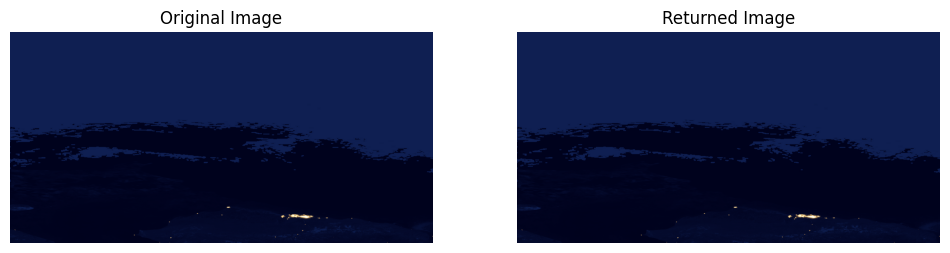

Original image size: 68350554 bytes
Returned image size: 68350554 bytes


In [19]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Display the original image
original_image = input("Please enter the original image filename: ")
original_img = Image.open(original_image)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title('Original Image')
plt.axis('off')

# Display the returned image
decompressed_img = Image.open('openmp_output.bmp')
plt.subplot(1, 2, 2)
plt.imshow(decompressed_img)
plt.title('Returned Image')
plt.axis('off')

plt.show()

# Print the size of the original and returned images
original_file_size = os.path.getsize(original_image)
decompressed_file_size = os.path.getsize('openmp_output.bmp')
print(f"Original image size: {original_file_size} bytes")
print(f"Returned image size: {decompressed_file_size} bytes")

###**g) Comparing similarity and sizes of Images**

In [20]:
!./compare_images testimg.bmp openmp_output.bmp

MSE: 0.0155246
[ WARN:0] global ./modules/core/src/matrix_expressions.cpp (1333) assign OpenCV/MatExpr: processing of multi-channel arrays might be changed in the future: https://github.com/opencv/opencv/issues/16739
[ WARN:0] global ./modules/core/src/matrix_expressions.cpp (1325) assign OpenCV/MatExpr: processing of multi-channel arrays might be changed in the future: https://github.com/opencv/opencv/issues/16739
SSIM: 0.999729


In [21]:
%%writefile compare_file_sizes.cpp
#include <iostream>
#include <filesystem>
#include <vector>

int main() {
    std::string prefix = "op_channel_";
    std::string originalFile = "testimg.bmp";
    long totalCompressedSize = 0;

    // Use a vector to store the filenames that match the prefix
    std::vector<std::string> compressedFiles;

    // Iterate through the current directory to find relevant files
    for (const auto& entry : std::filesystem::directory_iterator(".")) {
        if (entry.is_regular_file()) {
            std::string filename = entry.path().filename().string();
            // Check if the filename starts with the prefix using rfind
            if (filename.rfind(prefix, 0) == 0) {  // Check if the prefix matches
                compressedFiles.push_back(entry.path().string());
                totalCompressedSize += std::filesystem::file_size(entry.path());  // Directly get file size
            }
        }
    }

    long originalSize = std::filesystem::file_size(originalFile);  // Directly get file size

    // Check for errors
    if (totalCompressedSize == 0 || originalSize == 0) {
        std::cerr << "Error: Unable to determine file sizes.\n";
        return -1;
    }

    // Output the sizes
    std::cout << "Size of compressed: " << totalCompressedSize << " bytes\n";
    std::cout << "Size of original: " << originalSize << " bytes\n";

    // Calculate the compression ratio
    double compressionRatio = static_cast<double>(originalSize) / totalCompressedSize;
    std::cout << "Compression Ratio: " << compressionRatio << ":1\n";

    return 0;
}


Overwriting compare_file_sizes.cpp


In [22]:
!g++ compare_file_sizes.cpp -o compare_file_sizes
!./compare_file_sizes

Size of compressed: 5590200 bytes
Size of original: 68350554 bytes
Compression Ratio: 12.2269:1


<hr/>

## **3. CUDA Code**

###**a) Accept input via Upload**

In [ ]:
from google.colab import files

# Upload the image
uploaded = files.upload()
input_image = list(uploaded.keys())[0]

Saving testimg.png to testimg.png


###**b) Accept input via Command Line**

In [ ]:
# To get the cat image from Github
!wget https://raw.githubusercontent.com/RyankTheDS/Near-Lossless-Image-Compression-using-DCT/refs/heads/main/images/testimg.png

--2024-09-16 16:11:46--  https://svs.gsfc.nasa.gov/vis/a020000/a020200/a020255/frames/3840x2160_16x9_60p/Shot48/Shot48Frames/Shot48.00000.png
Resolving svs.gsfc.nasa.gov (svs.gsfc.nasa.gov)... 169.154.143.10, 2001:4d0:2418:143::10
Connecting to svs.gsfc.nasa.gov (svs.gsfc.nasa.gov)|169.154.143.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11402446 (11M) [image/png]
Saving to: ‘input_image.png’

input_image.png     100%[===================>]  10.87M  2.08MB/s    in 5.4s    

2024-09-16 16:11:52 (2.00 MB/s) - ‘input_image.png’ saved [11402446/11402446]



In [ ]:
# To get the dark image from Github
!wget -O testimg.png https://raw.githubusercontent.com/RyankTheDS/Near-Lossless-Image-Compression-using-DCT/refs/heads/main/images/dark.png

In [ ]:
# To get the NASA image from NASA directly (Way 1)
!wget -O testimg.png https://svs.gsfc.nasa.gov/vis/a030000/a030000/a030028/frames/6750x3375_2x1_30p/split-750m/dnb_land_ocean_ice.2012.13500x13500.A1-0000.png

In [ ]:
# To get the NASA image from Github (Way 2)
!wget -O testimg.png https://raw.githubusercontent.com/RyankTheDS/Near-Lossless-Image-Compression-using-DCT/refs/heads/main/images/dnb_land_ocean_ice.2012.13500x13500.A1-0000.png

###**c) For Comparing Images in terms of MSE and SSIM (verification code)**

In [ ]:
%%writefile compare_images.cpp
#include <opencv2/opencv.hpp>
#include <opencv2/core.hpp>
#include <opencv2/imgproc.hpp>
#include <opencv2/highgui.hpp>
#include <opencv2/imgcodecs.hpp>
#include <iostream>
#include <cmath>

using namespace cv;
using namespace std;

// Function to compute Mean Squared Error (MSE)
double computeMSE(const Mat& img1, const Mat& img2) {
    Mat s1;
    absdiff(img1, img2, s1);  // absolute difference
    s1.convertTo(s1, CV_32F);  // convert to float

    s1 = s1.mul(s1);  // square

    Scalar s = sum(s1);  // sum all pixels

    double mse = (s[0] + s[1] + s[2]) / (double)(img1.channels() * img1.total());
    return mse;
}

// Function to compute SSIM
Scalar computeSSIM(const Mat& img1, const Mat& img2) {
    const double C1 = 6.5025, C2 = 58.5225;
    Mat I1, I2;
    img1.convertTo(I1, CV_32F);  // convert to float
    img2.convertTo(I2, CV_32F);

    Mat I1_2 = I1.mul(I1);  // I1^2
    Mat I2_2 = I2.mul(I2);  // I2^2
    Mat I1_I2 = I1.mul(I2);  // I1 * I2

    Mat mu1, mu2;
    GaussianBlur(I1, mu1, Size(11, 11), 1.5);
    GaussianBlur(I2, mu2, Size(11, 11), 1.5);

    Mat mu1_2 = mu1.mul(mu1);
    Mat mu2_2 = mu2.mul(mu2);
    Mat mu1_mu2 = mu1.mul(mu2);

    Mat sigma1_2, sigma2_2, sigma12;
    GaussianBlur(I1_2, sigma1_2, Size(11, 11), 1.5);
    GaussianBlur(I2_2, sigma2_2, Size(11, 11), 1.5);
    GaussianBlur(I1_I2, sigma12, Size(11, 11), 1.5);

    sigma1_2 -= mu1_2;
    sigma2_2 -= mu2_2;
    sigma12 -= mu1_mu2;

    Mat t1, t2, t3;
    t1 = 2 * mu1_mu2 + C1;
    t2 = 2 * sigma12 + C2;
    t3 = t1.mul(t2);  // t3 = (2*mu1_mu2 + C1).*(2*sigma12 + C2)

    t1 = mu1_2 + mu2_2 + C1;
    t2 = sigma1_2 + sigma2_2 + C2;
    t1 = t1.mul(t2);  // t1 = (mu1_2 + mu2_2 + C1).*(sigma1_2 + sigma2_2 + C2)

    Mat ssim_map;
    divide(t3, t1, ssim_map);  // ssim_map = t3 ./ t1
    Scalar mssim = mean(ssim_map);  // mssim = average of ssim map
    return mssim;
}

int main(int argc, char** argv) {
    if (argc != 3) {
        cout << "Usage: ./compare_images <image1> <image2>" << endl;
        return -1;
    }

    Mat img1 = imread(argv[1], IMREAD_COLOR);
    Mat img2 = imread(argv[2], IMREAD_COLOR);

    if (img1.empty() || img2.empty()) {
        cout << "Could not open or find the images." << endl;
        return -1;
    }

    // Compute MSE
    double mse = computeMSE(img1, img2);
    cout << "MSE: " << mse << endl;

    // Compute SSIM
    Scalar ssim = computeSSIM(img1, img2);
    cout << "SSIM: " << ssim[0] << endl;

    return 0;
}

Writing compare_images.cpp


In [ ]:
!g++ compare_images.cpp -o compare_images `pkg-config --cflags --libs opencv4`

###**d) Compression and Decompression Code**

In [23]:
%%writefile dct_idct_zigzagrle.cu
#include <cuda_runtime.h>
#include <opencv2/opencv.hpp>
#include <iostream>
#include <vector>
#include <fstream>
#include <chrono>
#include <cmath>
#include <algorithm>
#include <string>
#include <filesystem>


#define BLOCK_SIZE 8

// Precomputed Cosine Values for 8x8 DCT and IDCT (stored in constant memory)
__constant__ float d_cos[64];

// Zig-Zag scan order (stored in constant memory)
int zigzagOrder[64] = {
    0, 1, 5, 6, 14, 15, 27, 28,
    2, 4, 7, 13, 16, 26, 29, 42,
    3, 8, 12, 17, 25, 30, 41, 43,
    9, 11, 18, 24, 31, 40, 44, 53,
    10, 19, 23, 32, 39, 45, 52, 54,
    20, 22, 33, 38, 46, 51, 55, 60,
    21, 34, 37, 47, 50, 56, 59, 61,
    35, 36, 48, 49, 57, 58, 62, 63
};

// CUDA Kernel for 8x8 DCT
__global__ void dct8x8Kernel(float* d_image, int width, int height, int channel) {
    __shared__ float block[BLOCK_SIZE][BLOCK_SIZE];
    int x = blockIdx.x * BLOCK_SIZE + threadIdx.x;
    int y = blockIdx.y * BLOCK_SIZE + threadIdx.y;

    if (x < width && y < height) {
        block[threadIdx.y][threadIdx.x] = d_image[(y * width + x) + channel * width * height];
    }
    __syncthreads();

    float sum = 0.0f;
    if (threadIdx.x < BLOCK_SIZE && threadIdx.y < BLOCK_SIZE) {
        for (int u = 0; u < BLOCK_SIZE; ++u) {
            for (int v = 0; v < BLOCK_SIZE; ++v) {
                sum += block[u][v] * d_cos[threadIdx.y * BLOCK_SIZE + u] * d_cos[threadIdx.x * BLOCK_SIZE + v];
            }
        }
        d_image[(y * width + x) + channel * width * height] = roundf(sum * 10) / 10;  // Quantization step
    }
}

// CUDA Kernel for 8x8 IDCT
__global__ void idct8x8Kernel(float* d_image, int width, int height, int channel) {
    __shared__ float block[BLOCK_SIZE][BLOCK_SIZE];
    int x = blockIdx.x * BLOCK_SIZE + threadIdx.x;
    int y = blockIdx.y * BLOCK_SIZE + threadIdx.y;

    if (x < width && y < height) {
        block[threadIdx.y][threadIdx.x] = d_image[(y * width + x) + channel * width * height];
    }
    __syncthreads();

    float sum = 0.0f;
    if (threadIdx.x < BLOCK_SIZE && threadIdx.y < BLOCK_SIZE) {
        for (int u = 0; u < BLOCK_SIZE; ++u) {
            for (int v = 0; v < BLOCK_SIZE; ++v) {
                sum += block[u][v] * d_cos[u * BLOCK_SIZE + threadIdx.y] * d_cos[v * BLOCK_SIZE + threadIdx.x];
            }
        }
        d_image[(y * width + x) + channel * width * height] = sum;
    }
}

// Zig-Zag ordering
std::vector<float> zigzag(const float* block) {
    std::vector<float> zz(64);
    for (int i = 0; i < 64; ++i) {
        zz[i] = block[zigzagOrder[i]];
    }
    return zz;
}

// Reverse Zig-Zag ordering
void reverseZigzag(const std::vector<float>& zz, float* block) {
    for (int i = 0; i < 64; ++i) {
        block[zigzagOrder[i]] = zz[i];
    }
}

// Run-Length Encoding (RLE)
std::vector<std::pair<float, int>> runLengthEncode(const std::vector<float>& zz) {
    std::vector<std::pair<float, int>> rle;
    float lastVal = zz[0];
    int count = 1;

    for (size_t i = 1; i < zz.size(); ++i) {
        if (zz[i] == lastVal) {
            count++;
        } else {
            rle.push_back({ lastVal, count });
            lastVal = zz[i];
            count = 1;
        }
    }
    rle.push_back({ lastVal, count });

    return rle;
}

// Run-Length Decoding (RLD)
std::vector<float> runLengthDecode(const std::vector<std::pair<float, int>>& rle) {
    std::vector<float> zz;

    for (const auto& pair : rle) {
        for (int i = 0; i < pair.second; ++i) {
            zz.push_back(pair.first);
        }
    }
    return zz;
}

void splitImage(const cv::Mat& image, std::vector<cv::Mat>& channels) {
    int numChannels = image.channels();
    int rows = image.rows;
    int cols = image.cols;

    if (channels.size() != numChannels) {
        std::cerr << "The number of output channels does not match the number of channels in the image" << std::endl;
        return;
    }

    for (int i = 0; i < numChannels; ++i) {
        channels[i] = cv::Mat(rows, cols, CV_32FC1); // Single-channel float image
        for (int r = 0; r < rows; ++r) {
            for (int c = 0; c < cols; ++c) {
                cv::Vec3f pixel = image.at<cv::Vec3f>(r, c);
                channels[i].at<float>(r, c) = pixel[i];
            }
        }
    }
}

void mergeImage(const std::vector<cv::Mat>& channels, cv::Mat& mergedImage) {
    int numChannels = channels.size();
    int rows = channels[0].rows;
    int cols = channels[0].cols;

    if (numChannels != 3) {
        std::cerr << "This implementation only supports 3 channels (RGB)" << std::endl;
        return;
    }

    if (channels[0].empty() || channels[1].empty() || channels[2].empty()) {
        std::cerr << "One or more channels are empty or uninitialized" << std::endl;
        return;
    }

    // Initialize the merged image with the same size as the input channels
    mergedImage.create(rows, cols, CV_32FC3); // 3-channel float image

    for (int r = 0; r < rows; ++r) {
        for (int c = 0; c < cols; ++c) {
            cv::Vec3f pixel;
            pixel[0] = channels[0].at<float>(r, c); // B channel
            pixel[1] = channels[1].at<float>(r, c); // G channel
            pixel[2] = channels[2].at<float>(r, c); // R channel
            mergedImage.at<cv::Vec3f>(r, c) = pixel;
        }
    }
}


// Process an image by applying DCT, Quantization, Zig-Zag, and RLE
void processImage(cv::Mat& paddedImg, float* d_image, int width, int height, int channels) {
    dim3 blockDim(BLOCK_SIZE, BLOCK_SIZE);
    dim3 gridDim((width + BLOCK_SIZE - 1) / BLOCK_SIZE, (height + BLOCK_SIZE - 1) / BLOCK_SIZE);

    std::vector<cv::Mat> imageChannels(channels);
    //cv::split(paddedImg, imageChannels);
    splitImage(paddedImg, imageChannels);




    //NEW CODE

    for (int c = 0; c < channels; ++c) {
        //***************************************COMPRESSION PHASE*************************************************************************
        std::string filename = "cuda_channel_" + std::to_string(c) + ".bin";
        std::ofstream rleFileOut(filename, std::ios::out | std::ios::binary);
        if (!rleFileOut.is_open()) {
            std::cerr << "Error opening file for writing: " << filename << std::endl;
            return;
        }

        // Copy the channel data to device
        cudaMemcpy(d_image + c * width * height, imageChannels[c].ptr<float>(), width * height * sizeof(float), cudaMemcpyHostToDevice);

        // Launch the DCT kernel
        dct8x8Kernel<<<gridDim, blockDim>>>(d_image, width, height, c);
        cudaDeviceSynchronize();

        // Copy the processed channel back to host
        cudaMemcpy(imageChannels[c].ptr<float>(), d_image + c * width * height, width * height * sizeof(float), cudaMemcpyDeviceToHost);

        for (int y = 0; y < height; y += BLOCK_SIZE) {
            for (int x = 0; x < width; x += BLOCK_SIZE) {
                float block[64];
                for (int by = 0; by < BLOCK_SIZE; ++by) {
                    for (int bx = 0; bx < BLOCK_SIZE; ++bx) {
                        block[by * BLOCK_SIZE + bx] = imageChannels[c].at<float>(y + by, x + bx);
                    }
                }

                // Zig-Zag
                std::vector<float> zz = zigzag(block);

                // RLE Encoding
                std::vector<std::pair<float, int>> rle = runLengthEncode(zz);


                 // Write RLE encoded data to the .rle file
                for (const auto& pair : rle) {
                    // Convert the DCT coefficient to int16_t to save space
                    int16_t quantizedValue = static_cast<int16_t>(round(pair.first));
                    // Store the count as uint8_t (assuming counts fit in this range)
                    uint8_t quantizedCount = static_cast<uint8_t>(std::min(pair.second, 255));  // Limit count to 255
                    // Write the quantized value and count to the file
                    rleFileOut.write(reinterpret_cast<const char*>(&quantizedValue), sizeof(quantizedValue));
                    rleFileOut.write(reinterpret_cast<const char*>(&quantizedCount), sizeof(quantizedCount));
                }
            }
        }
        rleFileOut.close();
        std::cout << "Compression complete. Data saved " << std::endl;
        //*********************************************************************************************************************************
        //***************************************DECOMPRESSION PHASE*************************************************************************
        std::ifstream rleFileIn(filename, std::ios::in | std::ios::binary);
        if (!rleFileIn.is_open()) {
            std::cerr << "Error opening file for writing: " << filename << std::endl;
            return;
        }

        for (int y = 0; y < height; y += BLOCK_SIZE) {
            for (int x = 0; x < width; x += BLOCK_SIZE) {
                float block[64];

                // Read RLE encoded data from the .bin file
                std::vector<std::pair<float, int>> rle;

                // Read RLE encoded data for this block
                for (int i = 0; i < 64;) {
                    int16_t value;      // Read value as int16_t
                    uint8_t count;      // Read count as uint8_t

                    if (rleFileIn.read(reinterpret_cast<char*>(&value), sizeof(value)) &&
                        rleFileIn.read(reinterpret_cast<char*>(&count), sizeof(count))) {
                        //rle.push_back({value, count});
                        rle.push_back({static_cast<float>(value), static_cast<int>(count)});
                        i += count;  // Increment i by count
                    } else {
                        std::cerr << "Error reading RLE data from file." << std::endl;
                        break;  // In case of error, break out of the loop
                    }
                }

                // RLE Decoding
                std::vector<float> decodedZigZag = runLengthDecode(rle);

                // Reverse Zig-Zag
                reverseZigzag(decodedZigZag, block);
                for (int by = 0; by < BLOCK_SIZE; ++by) {
                    for (int bx = 0; bx < BLOCK_SIZE; ++bx) {
                        imageChannels[c].at<float>(y + by, x + bx) = block[by * BLOCK_SIZE + bx];
                    }
                }
            }
        }


        //*********************************************************************************************************************************
        // Copy the modified image channel back to the GPU
        cudaMemcpy(d_image + c * width * height, imageChannels[c].ptr<float>(), width * height * sizeof(float), cudaMemcpyHostToDevice);

        // Launch the IDCT kernel
        idct8x8Kernel<<<gridDim, blockDim>>>(d_image, width, height, c);
        cudaDeviceSynchronize();

        // Copy the processed channel back to host
        cudaMemcpy(imageChannels[c].ptr<float>(), d_image + c * width * height, width * height * sizeof(float), cudaMemcpyDeviceToHost);
        rleFileIn.close();
        std::cout << "Decompression complete. Image reconstructed." << std::endl;
    }

    mergeImage(imageChannels, paddedImg);
}

int main(int argc, char** argv) {
    // Start timing for the overall program
    std::string inputFilename = argv[1];
    auto start = std::chrono::high_resolution_clock::now();

    // Load the image using OpenCV
    cv::Mat image = cv::imread(inputFilename, cv::IMREAD_COLOR);
    if (image.empty()) {
        std::cerr << "Error: Could not open or find the image!" << std::endl;
        return -1;
    }

    // Pad the image to ensure dimensions are multiples of 8
    int paddedRows = (image.rows + 7) & ~7;
    int paddedCols = (image.cols + 7) & ~7;
    cv::Mat paddedImg;
    cv::copyMakeBorder(image, paddedImg, 0, paddedRows - image.rows, 0, paddedCols - image.cols, cv::BORDER_CONSTANT, cv::Scalar::all(0));

    int width = paddedImg.cols;
    int height = paddedImg.rows;
    int channels = paddedImg.channels();

    // Convert image to float and split into individual channels
    paddedImg.convertTo(paddedImg, CV_32F);

    // Allocate memory on the device (GPU)
    float* d_image;
    cudaMalloc(&d_image, width * height * channels * sizeof(float));

    // Precomputed Cosine Values for 8x8 DCT and IDCT
    float h_cos[64] = {
        0.3536, 0.3536, 0.3536, 0.3536, 0.3536, 0.3536, 0.3536, 0.3536,
        0.4904, 0.4157, 0.2778, 0.0975, -0.0975, -0.2778, -0.4157, -0.4904,
        0.4619, 0.1913, -0.1913, -0.4619, -0.4619, -0.1913, 0.1913, 0.4619,
        0.4157, -0.0975, -0.4904, -0.2778, 0.2778, 0.4904, 0.0975, -0.4157,
        0.3536, -0.3536, -0.3536, 0.3536, 0.3536, -0.3536, -0.3536, 0.3536,
        0.2778, -0.4904, 0.0975, 0.4157, -0.4157, -0.0975, 0.4904, -0.2778,
        0.1913, -0.4619, 0.4619, -0.1913, -0.1913, 0.4619, -0.4619, 0.1913,
        0.0975, -0.2778, 0.4157, -0.4904, 0.4904, -0.4157, 0.2778, -0.0975
    };

    // Copy precomputed cosine values to device constant memory
    cudaMemcpyToSymbol(d_cos, h_cos, 64 * sizeof(float));

    // Create CUDA events for GPU timing
    cudaEvent_t startEvent, stopEvent;
    cudaEventCreate(&startEvent);
    cudaEventCreate(&stopEvent);

    // Record the start event
    cudaEventRecord(startEvent, 0);

    // Launch the kernel
    //processImageKernel<<<dim3(width / 8, height / 8), dim3(8, 8)>>>(d_image, width, height, channels);

    // Process the image (DCT, Quantization, Zig-Zag, RLE, etc.)
    processImage(paddedImg, d_image, width, height, channels);

    // Record the stop event
    cudaEventRecord(stopEvent, 0);
    cudaEventSynchronize(stopEvent);

    // Calculate the elapsed time between the events
    float gpuTime = 0.0f;
    cudaEventElapsedTime(&gpuTime, startEvent, stopEvent);

    // Clean up CUDA events
    cudaEventDestroy(startEvent);
    cudaEventDestroy(stopEvent);

    // Convert back to 8-bit image and crop to original size
    cv::Mat result;
    paddedImg.convertTo(result, CV_8U);

    // Crop to original size
    result = result(cv::Rect(0, 0, image.cols, image.rows));

    // Save the processed image
    cv::imwrite("cuda_output.bmp", result);

    // End timing for the overall program
    auto endTime = std::chrono::high_resolution_clock::now();
    std::chrono::duration<double, std::milli> duration = endTime - start;

    // Print the size of the output image
    std::ifstream file("cuda_output.bmp", std::ifstream::ate | std::ifstream::binary);
    double size = static_cast<double>(file.tellg()) / 1024;  // Size in KB
    std::cout << "Returned image size: " << size << " KB" << std::endl;
    std::cout << "GPU Time: " << gpuTime << " milliseconds" << std::endl;
    std::cout << "Total Time (including I/O): " << duration.count() << " milliseconds" << std::endl;

    // Free GPU memory
    cudaFree(d_image);

    // Save GPU time and total time to CSV
    std::ofstream timeFile;
    timeFile.open("/content/CUDAcompression_times.csv", std::ios::out);  // Open in append mode
    if (timeFile.is_open()) {
        timeFile << "CUDA," << gpuTime << "," << duration.count() << "\n";  // Save both GPU and total time
        timeFile.close();
    } else {
        std::cerr << "Unable to open file for writing!" << std::endl;
    }

    std::vector<std::string> filenames = {"cuda_channel_0.bin", "cuda_channel_1.bin", "cuda_channel_2.bin"};

    for (const auto& filename : filenames) {
        std::string xzFilename = filename + ".xz";

        if (std::filesystem::exists(xzFilename)) {
            std::string removeCommand = "rm " + xzFilename;
            std::system(removeCommand.c_str());
        }

        std::string compressCommand = "xz " + filename;
        int result = system(compressCommand.c_str());
        if (result != 0) {
            std::cerr << "Error compressing file to .xz format." << std::endl;
        }
    }

    for (const auto& filename : filenames) {
        remove(filename.c_str());
    }

    return 0;
}


Writing dct_idct_zigzagrle.cu


In [24]:
!nvcc -o dct_idct_zigzagrle dct_idct_zigzagrle.cu $(pkg-config --cflags --libs opencv4) -lcudart -Xcompiler -Wno-unknown-warning-option -Xcompiler -Wno-611 -diag-suppress 611

In [25]:
# For converting input image to bmp
# Run the compiled program
!./png_to_bmp testimg.png
#!./png_to_bmp orangecat.png
#!./png_to_bmp dark.png

Image loaded: 6750x3375, 3 original channels.
Image is now converted to 3 channels (RGB).
Successfully saved BMP as testimg.bmp


###**e) Time taken to encode and decode**

In [26]:
!./dct_idct_zigzagrle testimg.bmp

Compression complete. Data saved 
Decompression complete. Image reconstructed.
Compression complete. Data saved 
Decompression complete. Image reconstructed.
Compression complete. Data saved 
Decompression complete. Image reconstructed.
Returned image size: 66748.6 KB
GPU Time: 14859 milliseconds
Total Time (including I/O): 15590.5 milliseconds


###**f) Appearance of Images**

Please enter the original image filename: testimg.bmp


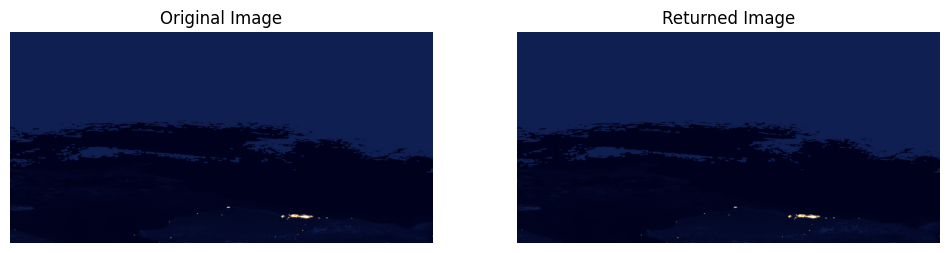

Original image size: 68350554 bytes
Returned image size: 68350554 bytes


In [27]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Display the original image
original_image = input("Please enter the original image filename: ")
original_img = Image.open(original_image)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title('Original Image')
plt.axis('off')

# Display the decompressed image
decompressed_img = Image.open('cuda_output.bmp')
plt.subplot(1, 2, 2)
plt.imshow(decompressed_img)
plt.title('Returned Image')
plt.axis('off')

plt.show()

# Print the size of the original and compressed images
original_file_size = os.path.getsize(original_image)
decompressed_file_size = os.path.getsize('cuda_output.bmp')
print(f"Original image size: {original_file_size} bytes")
print(f"Returned image size: {decompressed_file_size} bytes")

In [46]:
!nvprof ./dct_idct_zigzagrle testimg.bmp

==10211== NVPROF is profiling process 10211, command: ./dct_idct_zigzagrle testimg.bmp
Compression complete. Data saved 
Decompression complete. Image reconstructed.
Compression complete. Data saved 
Decompression complete. Image reconstructed.
Compression complete. Data saved 
Decompression complete. Image reconstructed.
Returned image size: 66748.6 KB
GPU Time: 15693.2 milliseconds
Total Time (including I/O): 16397.2 milliseconds
==10211== Profiling application: ./dct_idct_zigzagrle testimg.bmp
==10211== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   46.25%  118.94ms         7  16.992ms     704ns  21.104ms  [CUDA memcpy HtoD]
                   40.88%  105.13ms         6  17.522ms  16.506ms  18.905ms  [CUDA memcpy DtoH]
                    7.50%  19.279ms         3  6.4262ms  6.4253ms  6.4273ms  idct8x8Kernel(float*, int, int, int)
                    5.37%  13.818ms         3  4.6062ms  4.6059ms  4.6063ms  dct8x

###**g) Comparing similarity and sizes of Images**

In [28]:
!./compare_images testimg.bmp cuda_output.bmp

MSE: 0.0156454
[ WARN:0] global ./modules/core/src/matrix_expressions.cpp (1333) assign OpenCV/MatExpr: processing of multi-channel arrays might be changed in the future: https://github.com/opencv/opencv/issues/16739
[ WARN:0] global ./modules/core/src/matrix_expressions.cpp (1325) assign OpenCV/MatExpr: processing of multi-channel arrays might be changed in the future: https://github.com/opencv/opencv/issues/16739
SSIM: 0.999726


In [29]:
%%writefile compare_file_sizes.cpp
#include <iostream>
#include <string>
#include <vector>
#include <filesystem>

int main() {
    std::string directory = ".";
    long totalCompressedSize = 0;

    // Iterate through the files in the directory
    for (const auto& entry : std::filesystem::directory_iterator(directory)) {
        if (entry.is_regular_file()) {
            std::string filename = entry.path().filename().string();
            // Check if the filename starts with "cuda_channel_"
            if (filename.rfind("cuda_channel_", 0) == 0) {  // Check if the prefix matches
                totalCompressedSize += std::filesystem::file_size(entry.path());  // Get file size directly
            }
        }
    }

    // Get the size of the decompressed output file
    std::string originalFile = "testimg.bmp";
    long originalSize = std::filesystem::file_size(originalFile);  // Get file size directly

    // Check for errors
    if (totalCompressedSize == 0 || originalSize == 0) {
        std::cerr << "Error: Unable to determine file sizes.\n";
        return -1;
    }

    // Output the sizes
    std::cout << "Size of compressed: " << totalCompressedSize << " bytes\n";
    std::cout << "Size of original: " << originalSize << " bytes\n";

    // Calculate the compression ratio
    double compressionRatio = static_cast<double>(originalSize) / totalCompressedSize;
    std::cout << "Compression Ratio: " << compressionRatio << ":1\n";

    return 0;
}


Overwriting compare_file_sizes.cpp


In [30]:
!g++ compare_file_sizes.cpp -o compare_file_sizes
!./compare_file_sizes

Size of compressed: 5680140 bytes
Size of original: 68350554 bytes
Compression Ratio: 12.0333:1


<hr/>

## **4. MPI Code**

###**a) Accept input via Upload**

In [ ]:
from google.colab import files

# Upload the image
uploaded = files.upload()
input_image = list(uploaded.keys())[0]

Saving testimg.png to testimg.png


###**b) Accept input via Command Line**

In [ ]:
# To get the cat image from Github
!wget https://raw.githubusercontent.com/RyankTheDS/Near-Lossless-Image-Compression-using-DCT/refs/heads/main/images/testimg.png

--2024-09-13 13:39:31--  https://svs.gsfc.nasa.gov/vis/a020000/a020200/a020255/frames/3840x2160_16x9_60p/Shot48/Shot48Frames/Shot48.00000.png
Resolving svs.gsfc.nasa.gov (svs.gsfc.nasa.gov)... 169.154.143.10, 2001:4d0:2418:143::10
Connecting to svs.gsfc.nasa.gov (svs.gsfc.nasa.gov)|169.154.143.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11402446 (11M) [image/png]
Saving to: ‘input_image.png’

input_image.png     100%[===================>]  10.87M  13.2MB/s    in 0.8s    

2024-09-13 13:39:32 (13.2 MB/s) - ‘input_image.png’ saved [11402446/11402446]



In [ ]:
# To get the dark image from Github
!wget -O testimg.png https://raw.githubusercontent.com/RyankTheDS/Near-Lossless-Image-Compression-using-DCT/refs/heads/main/images/dark.png

In [ ]:
# To get the NASA image from NASA directly (Way 1)
!wget -O testimg.png https://svs.gsfc.nasa.gov/vis/a030000/a030000/a030028/frames/6750x3375_2x1_30p/split-750m/dnb_land_ocean_ice.2012.13500x13500.A1-0000.png

In [ ]:
# To get the NASA image from Github (Way 2)
!wget -O testimg.png https://raw.githubusercontent.com/RyankTheDS/Near-Lossless-Image-Compression-using-DCT/refs/heads/main/images/dnb_land_ocean_ice.2012.13500x13500.A1-0000.png

###**c) For Comparing Images in terms of MSE and SSIM (verification code)**

In [ ]:
%%writefile compare_images.cpp
#include <opencv2/opencv.hpp>
#include <opencv2/core.hpp>
#include <opencv2/imgproc.hpp>
#include <opencv2/highgui.hpp>
#include <opencv2/imgcodecs.hpp>
#include <iostream>
#include <cmath>

using namespace cv;
using namespace std;

// Function to compute Mean Squared Error (MSE)
double computeMSE(const Mat& img1, const Mat& img2) {
    Mat s1;
    absdiff(img1, img2, s1);  // absolute difference
    s1.convertTo(s1, CV_32F);  // convert to float

    s1 = s1.mul(s1);  // square

    Scalar s = sum(s1);  // sum all pixels

    double mse = (s[0] + s[1] + s[2]) / (double)(img1.channels() * img1.total());
    return mse;
}

// Function to compute SSIM
Scalar computeSSIM(const Mat& img1, const Mat& img2) {
    const double C1 = 6.5025, C2 = 58.5225;
    Mat I1, I2;
    img1.convertTo(I1, CV_32F);  // convert to float
    img2.convertTo(I2, CV_32F);

    Mat I1_2 = I1.mul(I1);  // I1^2
    Mat I2_2 = I2.mul(I2);  // I2^2
    Mat I1_I2 = I1.mul(I2);  // I1 * I2

    Mat mu1, mu2;
    GaussianBlur(I1, mu1, Size(11, 11), 1.5);
    GaussianBlur(I2, mu2, Size(11, 11), 1.5);

    Mat mu1_2 = mu1.mul(mu1);
    Mat mu2_2 = mu2.mul(mu2);
    Mat mu1_mu2 = mu1.mul(mu2);

    Mat sigma1_2, sigma2_2, sigma12;
    GaussianBlur(I1_2, sigma1_2, Size(11, 11), 1.5);
    GaussianBlur(I2_2, sigma2_2, Size(11, 11), 1.5);
    GaussianBlur(I1_I2, sigma12, Size(11, 11), 1.5);

    sigma1_2 -= mu1_2;
    sigma2_2 -= mu2_2;
    sigma12 -= mu1_mu2;

    Mat t1, t2, t3;
    t1 = 2 * mu1_mu2 + C1;
    t2 = 2 * sigma12 + C2;
    t3 = t1.mul(t2);  // t3 = (2*mu1_mu2 + C1).*(2*sigma12 + C2)

    t1 = mu1_2 + mu2_2 + C1;
    t2 = sigma1_2 + sigma2_2 + C2;
    t1 = t1.mul(t2);  // t1 = (mu1_2 + mu2_2 + C1).*(sigma1_2 + sigma2_2 + C2)

    Mat ssim_map;
    divide(t3, t1, ssim_map);  // ssim_map = t3 ./ t1
    Scalar mssim = mean(ssim_map);  // mssim = average of ssim map
    return mssim;
}

int main(int argc, char** argv) {
    if (argc != 3) {
        cout << "Usage: ./compare_images <image1> <image2>" << endl;
        return -1;
    }

    Mat img1 = imread(argv[1], IMREAD_COLOR);
    Mat img2 = imread(argv[2], IMREAD_COLOR);

    if (img1.empty() || img2.empty()) {
        cout << "Could not open or find the images." << endl;
        return -1;
    }

    // Compute MSE
    double mse = computeMSE(img1, img2);
    cout << "MSE: " << mse << endl;

    // Compute SSIM
    Scalar ssim = computeSSIM(img1, img2);
    cout << "SSIM: " << ssim[0] << endl;

    return 0;
}

Overwriting compare_images.cpp


In [ ]:
!g++ compare_images.cpp -o compare_images `pkg-config --cflags --libs opencv4`

###**d) Compression and Decompression Code**

In [31]:
%%writefile compress_image.cpp
#include <iostream>
#include <chrono>
#include "mpi.h"
#include "opencv2/opencv.hpp"
#include <fstream>
#include <string>
#include <cstdlib>
#include <filesystem>


// Function to perform 2D DCT
void dct2(const cv::Mat& src, cv::Mat& dst) {
    int M = src.rows;
    int N = src.cols;
    dst.create(M, N, CV_64F);

    // Hardcoded cosine values for an 8x8 matrix for DCT
    const double cosTableX[8][8] = {
        {1.0, 0.980785, 0.923880, 0.831470, 0.707107, 0.555570, 0.382683, 0.195090},
        {1.0, 0.831470, 0.382683, -0.195090, -0.707107, -0.980785, -0.923880, -0.555570},
        {1.0, 0.555570, -0.382683, -0.980785, -0.707107, 0.195090, 0.923880, 0.831470},
        {1.0, 0.195090, -0.923880, -0.555570, 0.707107, 0.831470, -0.382683, -0.980785},
        {1.0, -0.195090, -0.923880, 0.555570, 0.707107, -0.831470, -0.382683, 0.980785},
        {1.0, -0.555570, -0.382683, 0.980785, -0.707107, -0.195090, 0.923880, -0.831470},
        {1.0, -0.831470, 0.382683, 0.195090, -0.707107, 0.980785, -0.923880, 0.555570},
        {1.0, -0.980785, 0.923880, -0.831470, 0.707107, -0.555570, 0.382683, -0.195090}
    };

    const double cosTableY[8][8] = {
        {1.0, 0.980785, 0.923880, 0.831470, 0.707107, 0.555570, 0.382683, 0.195090},
        {1.0, 0.831470, 0.382683, -0.195090, -0.707107, -0.980785, -0.923880, -0.555570},
        {1.0, 0.555570, -0.382683, -0.980785, -0.707107, 0.195090, 0.923880, 0.831470},
        {1.0, 0.195090, -0.923880, -0.555570, 0.707107, 0.831470, -0.382683, -0.980785},
        {1.0, -0.195090, -0.923880, 0.555570, 0.707107, -0.831470, -0.382683, 0.980785},
        {1.0, -0.555570, -0.382683, 0.980785, -0.707107, -0.195090, 0.923880, -0.831470},
        {1.0, -0.831470, 0.382683, 0.195090, -0.707107, 0.980785, -0.923880, 0.555570},
        {1.0, -0.980785, 0.923880, -0.831470, 0.707107, -0.555570, 0.382683, -0.195090}
    };

    for (int u = 0; u < M; ++u) {
        for (int v = 0; v < N; ++v) {
            double sum = 0.0;
            for (int x = 0; x < M; ++x) {
                for (int y = 0; y < N; ++y) {
                    //double cosX = cos(M_PI / M * (x + 0.5) * u);
                    //double cosY = cos(M_PI / N * (y + 0.5) * v);
                    sum += src.at<double>(x, y) * cosTableX[x][u] * cosTableY[y][v];;
                }
            }
            double C_u = (u == 0) ? sqrt(1.0 / M) : sqrt(2.0 / M);
            double C_v = (v == 0) ? sqrt(1.0 / N) : sqrt(2.0 / N);
            dst.at<double>(u, v) = C_u * C_v * sum;
        }
    }
}

// Function to perform 2D IDCT
void idct2(const cv::Mat& src, cv::Mat& dst) {
    int M = src.rows;
    int N = src.cols;
    dst.create(M, N, CV_64F);

    // Hardcoded cosine values for an 8x8 matrix for IDCT
    const double cosTableX[8][8] = {
        {1.0, 0.980785, 0.923880, 0.831470, 0.707107, 0.555570, 0.382683, 0.195090},
        {1.0, 0.831470, 0.382683, -0.195090, -0.707107, -0.980785, -0.923880, -0.555570},
        {1.0, 0.555570, -0.382683, -0.980785, -0.707107, 0.195090, 0.923880, 0.831470},
        {1.0, 0.195090, -0.923880, -0.555570, 0.707107, 0.831470, -0.382683, -0.980785},
        {1.0, -0.195090, -0.923880, 0.555570, 0.707107, -0.831470, -0.382683, 0.980785},
        {1.0, -0.555570, -0.382683, 0.980785, -0.707107, -0.195090, 0.923880, -0.831470},
        {1.0, -0.831470, 0.382683, 0.195090, -0.707107, 0.980785, -0.923880, 0.555570},
        {1.0, -0.980785, 0.923880, -0.831470, 0.707107, -0.555570, 0.382683, -0.195090}
    };

    const double cosTableY[8][8] = {
        {1.0, 0.980785, 0.923880, 0.831470, 0.707107, 0.555570, 0.382683, 0.195090},
        {1.0, 0.831470, 0.382683, -0.195090, -0.707107, -0.980785, -0.923880, -0.555570},
        {1.0, 0.555570, -0.382683, -0.980785, -0.707107, 0.195090, 0.923880, 0.831470},
        {1.0, 0.195090, -0.923880, -0.555570, 0.707107, 0.831470, -0.382683, -0.980785},
        {1.0, -0.195090, -0.923880, 0.555570, 0.707107, -0.831470, -0.382683, 0.980785},
        {1.0, -0.555570, -0.382683, 0.980785, -0.707107, -0.195090, 0.923880, -0.831470},
        {1.0, -0.831470, 0.382683, 0.195090, -0.707107, 0.980785, -0.923880, 0.555570},
        {1.0, -0.980785, 0.923880, -0.831470, 0.707107, -0.555570, 0.382683, -0.195090}
    };

    for (int x = 0; x < M; ++x) {
        for (int y = 0; y < N; ++y) {
            double sum = 0.0;
            for (int u = 0; u < M; ++u) {
                for (int v = 0; v < N; ++v) {
                    double C_u = (u == 0) ? sqrt(1.0 / M) : sqrt(2.0 / M);
                    double C_v = (v == 0) ? sqrt(1.0 / N) : sqrt(2.0 / N);
                    //double cosX = cos(M_PI / M * (x + 0.5) * u);
                    //double cosY = cos(M_PI / N * (y + 0.5) * v);
                    sum += C_u * C_v * src.at<double>(u, v) * cosTableX[x][u] * cosTableY[y][v];
                }
            }
            dst.at<double>(x, y) = sum;
        }
    }
}




// Zig-Zag scan function
std::vector<double> zigzagScan(const cv::Mat& block) {
    int n = block.rows;
    std::vector<double> result;
    result.reserve(n * n);
    for (int i = 0; i < 2 * n - 1; ++i) {
        if (i % 2 == 0) {
            for (int j = 0; j <= i; ++j) {
                if (j < n && (i - j) < n) {
                    result.push_back(block.at<double>(j, i - j));
                }
            }
        } else {
            for (int j = 0; j <= i; ++j) {
                if (j < n && (i - j) < n) {
                    result.push_back(block.at<double>(i - j, j));
                }
            }
        }
    }
    return result;
}

// RLE encoding function
std::vector<std::pair<double, int>> rleEncode(const std::vector<double>& data) {
    std::vector<std::pair<double, int>> encodedData;
    int count = 1;
    double current = data[0];
    for (size_t i = 1; i < data.size(); ++i) {
        if (data[i] == current) {
            count++;
        } else {
            encodedData.push_back({current, count});
            current = data[i];
            count = 1;
        }
    }
    encodedData.push_back({current, count});
    return encodedData;
}

// RLE decoding function
std::vector<double> rleDecode(const std::vector<std::pair<double, int>>& encodedData) {
    std::vector<double> decodedData;
    for (const auto& elem : encodedData) {
        decodedData.insert(decodedData.end(), elem.second, elem.first);
    }
    return decodedData;
}



void splitImage(const cv::Mat& image, std::vector<cv::Mat>& channels) {
    int rows = image.rows;
    int cols = image.cols;
    int numChannels = image.channels();

    // Resize vector to hold all channels
    channels.resize(numChannels);

    // Initialize each channel as a single-channel matrix with the same dimensions as the input image
    for (int ch = 0; ch < numChannels; ++ch) {
        channels[ch] = cv::Mat(rows, cols, CV_8UC1);
    }

    // Iterate over the image and split the channels manually
    for (int r = 0; r < rows; ++r) {
        for (int c = 0; c < cols; ++c) {
            // Get pixel value (multi-channel pixel)
            cv::Vec3b pixel = image.at<cv::Vec3b>(r, c);
            // Assign each channel its corresponding value
            for (int ch = 0; ch < numChannels; ++ch) {
                channels[ch].at<uchar>(r, c) = pixel[ch];
            }
        }
    }
}

// // Function to merge multiple single-channel images into a multi-channel image
void mergeImage(const std::vector<cv::Mat>& channels, cv::Mat& mergedImage) {
    if (channels.empty() || channels[0].empty()) {
        std::cerr << "Channels are empty or uninitialized" << std::endl;
        return;
    }

    int numChannels = channels.size();
    if (numChannels != 3) {
        std::cerr << "This implementation only supports 3 channels (RGB)" << std::endl;
        return;
    }

    int rows = channels[0].rows;
    int cols = channels[0].cols;

    // Initialize the merged image with the same size as the input channels
    mergedImage.create(rows, cols, CV_8UC3); // CV_8UC3 for 3-channel image

    // Iterate over each pixel and assign values to the merged image
    for (int r = 0; r < rows; ++r) {
        for (int c = 0; c < cols; ++c) {
            cv::Vec<uchar, 3> pixel; // For RGB, use Vec<uchar, 3>
            for (int ch = 0; ch < numChannels; ++ch) {
                pixel[ch] = channels[ch].at<uchar>(r, c);
            }
            mergedImage.at<cv::Vec<uchar, 3>>(r, c) = pixel; // Store pixel value in merged image
        }
    }
}





int main(int argc, char** argv)
{
    MPI_Init(&argc, &argv);
    int size, rank;
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);
    MPI_Comm_size(MPI_COMM_WORLD, &size);


    MPI_Barrier(MPI_COMM_WORLD);

    std::string inputFilename = argv[1];

    auto start = std::chrono::high_resolution_clock::now();

    cv::Mat image;
    size_t imageTotalSize;
    size_t imagePartialSize;
    int channels;
    uchar* partialBuffer;
    cv::Mat outImage;
    int originalRows, originalCols;



    int rowsPerProcess;  // Number of rows per process
    int cols;  // Number of columns (constant across all processes)

    if (rank == 0)
    {
        image = cv::imread(inputFilename, cv::IMREAD_COLOR);
        if (image.empty())
        {
            std::cerr << "Image is empty, terminating!" << std::endl;
            MPI_Abort(MPI_COMM_WORLD, -1);
        }

        originalRows = image.rows;
        originalCols = image.cols;
        channels = image.channels();

        // Pad image to the nearest multiple of 8
        int paddedRows = (originalRows + 7) & ~7;
        int paddedCols = (originalCols + 7) & ~7;

        // Pad the image if necessary
        if (paddedRows != originalRows || paddedCols != originalCols)
        {
            cv::Mat paddedImage;
            cv::copyMakeBorder(image, paddedImage, 0, paddedRows - originalRows, 0, paddedCols - originalCols, cv::BORDER_CONSTANT, cv::Scalar(0, 0, 0));
            image = paddedImage;
        }

        cols = image.cols;

        // Calculate the total size of the image (rows * columns * channels)
        imageTotalSize = image.step[0] * image.rows;

        if (image.total() % size)
        {
            std::cerr << "Cannot evenly divide the image between the processes. Choose a different number of processes!" << std::endl;
            MPI_Abort(MPI_COMM_WORLD, -2);
        }

        rowsPerProcess = image.rows / size;
        imagePartialSize = rowsPerProcess * image.step[0]; // rows * cols * channels

        std::cout << "The image will be divided into blocks of " << imagePartialSize << " bytes each" << std::endl;
        std::cout << "Number of rows: " << image.rows << std::endl;
        std::cout << "Rows per process: " << rowsPerProcess << std::endl;
        std::cout << "Columns per process: " << cols << std::endl;
    }

    MPI_Bcast(&imagePartialSize, 1, MPI_UNSIGNED_LONG_LONG, 0, MPI_COMM_WORLD);
    MPI_Bcast(&channels, 1, MPI_INT, 0, MPI_COMM_WORLD);
    MPI_Bcast(&rowsPerProcess, 1, MPI_INT, 0, MPI_COMM_WORLD);
    MPI_Bcast(&cols, 1, MPI_INT, 0, MPI_COMM_WORLD);


    MPI_Barrier(MPI_COMM_WORLD);

    partialBuffer = new uchar[imagePartialSize];

    MPI_Barrier(MPI_COMM_WORLD);

    MPI_Scatter(image.data, imagePartialSize, MPI_UNSIGNED_CHAR, partialBuffer, imagePartialSize, MPI_UNSIGNED_CHAR, 0, MPI_COMM_WORLD);

    MPI_Barrier(MPI_COMM_WORLD);

    // Convert the partial buffer back to a Mat
    cv::Mat partialImage(rowsPerProcess, cols, CV_8UC3, partialBuffer); // Convert uchar array to Mat with 3 channels

    // Split the image into 3 channels (B, G, R)
    std::vector<cv::Mat> channelsMat(3);
    //cv::split(partialImage, channelsMat);  // Split the image into B, G, R channels
    splitImage(partialImage, channelsMat);  // Split the image into B, G, R channels

    // Perform 8x8 DCT and IDCT on each channel independently
    for (int ch = 0; ch < 3; ++ch)
    {
        //*****************************************Compression Phase*************************************************
        std::string filename = "mpi_channel_" + std::to_string(ch) + "_" + std::to_string(rank) + ".bin";
        // Open the .rle file for the channel
        std::ofstream rleFileOut(filename, std::ios::out | std::ios::binary);
        if (!rleFileOut.is_open()) {
            std::cerr << "Error opening file for writing: " << filename << std::endl;
            return -1;
        }
        for (int r = 0; r < channelsMat[ch].rows; r += 8)
        {
            for (int c = 0; c < channelsMat[ch].cols; c += 8)
            {
                // Ensure the block is within the image bounds
                int blockRows = std::min(8, channelsMat[ch].rows - r);
                int blockCols = std::min(8, channelsMat[ch].cols - c);

                // Extract the 8x8 block for the current channel
                cv::Mat block = channelsMat[ch](cv::Rect(c, r, blockCols, blockRows));

                // Convert the block to double (for DCT/IDCT processing)
                block.convertTo(block, CV_64F);

                // Perform DCT on the block
                cv::Mat dctBlock;
                //cv::dct(block, dctBlock);
                dct2(block, dctBlock);

                // Truncate DCT coefficients to 1 decimal place
                for (int i = 0; i < dctBlock.rows; ++i)
                {
                    for (int j = 0; j < dctBlock.cols; ++j)
                    {
                        dctBlock.at<double>(i, j) = std::round(dctBlock.at<double>(i, j) * 10) / 10;
                    }
                }

                // Zig-Zag scanning and RLE encoding
                std::vector<double> zigzagged = zigzagScan(dctBlock);
                std::vector<std::pair<double, int>> rleEncoded = rleEncode(zigzagged);

                // Write RLE encoded data to the .rle file
                for (const auto& pair : rleEncoded) {
                    // Use float for value instead of double
                    //float value = static_cast<float>(pair.first);
                    //uint16_t count = static_cast<uint16_t>(pair.second); // Use uint16_t for count
                    // Convert the DCT coefficient to int16_t to save space
                    int16_t value = static_cast<int16_t>(round(pair.first));
                    // Store the count as uint8_t (assuming counts fit in this range)
                    uint8_t count = static_cast<uint8_t>(std::min(pair.second, 255));  // Limit count to 255

                    rleFileOut.write(reinterpret_cast<const char*>(&value), sizeof(value));
                    rleFileOut.write(reinterpret_cast<const char*>(&count), sizeof(count));
                }
            }
        }
        // Close the .bin file after writing
        rleFileOut.close();
        std::cout << "Compression complete. Data saved" << std::endl;
        //****************************************************************************************************************

        //***********************************************Decompression Phase**********************************************
        std::ifstream rleFileIn(filename, std::ios::in | std::ios::binary);
        if (!rleFileIn.is_open()) {
            std::cerr << "Error opening file for writing: " << filename << std::endl;
            return -1;
        }

        for (int r = 0; r < channelsMat[ch].rows; r += 8)
        {
            for (int c = 0; c < channelsMat[ch].cols; c += 8)
            {
                // Ensure the block is within the image bounds
                int blockRows = std::min(8, channelsMat[ch].rows - r);
                int blockCols = std::min(8, channelsMat[ch].cols - c);

                // Extract the 8x8 block for the current channel
                cv::Mat block = channelsMat[ch](cv::Rect(c, r, blockCols, blockRows));

                // Convert the block to double (for DCT/IDCT processing)
                block.convertTo(block, CV_64F);

                // Read the RLE-encoded data from the .bin file for the current block
                std::vector<std::pair<double, int>> rleEncoded;
                int totalElements = blockCols * blockRows;  // Total number of elements in the block
                int countElements = 0;

                while (countElements < totalElements && rleFileIn.good()) {
                    //float value;         // Read value as float
                    //uint16_t count;     // Read count as uint16_t
                    int16_t value;      // Read value as int16_t
                    uint8_t count;      // Read count as uint8_t
                    rleFileIn.read(reinterpret_cast<char*>(&value), sizeof(value));
                    rleFileIn.read(reinterpret_cast<char*>(&count), sizeof(count));

                    if (rleFileIn.gcount() == 0) break;  // Break at EOF
                    //rleEncoded.push_back({value, count});
                    rleEncoded.push_back({static_cast<double>(value), static_cast<int>(count)}); // Cast to double and int
                    countElements += count;  // Update the count of elements read
                }

                // Decode RLE and reverse Zig-Zag for reconstruction
                std::vector<double> decodedZigzag = rleDecode(rleEncoded);
                cv::Mat reconstructedBlock = cv::Mat::zeros(blockRows, blockCols, CV_64F);
                int index = 0;
                for (int i = 0; i < 2 * blockCols - 1; ++i) {
                    if (i % 2 == 0) {
                        for (int j = 0; j <= i; ++j) {
                            if (j < blockCols && (i - j) < blockRows) {
                                reconstructedBlock.at<double>(j, i - j) = decodedZigzag[index++];
                            }
                        }
                    } else {
                        for (int j = 0; j <= i; ++j) {
                            if (j < blockCols && (i - j) < blockRows) {
                                reconstructedBlock.at<double>(i - j, j) = decodedZigzag[index++];
                            }
                        }
                    }
                }
                // Perform IDCT to reconstruct the block
                cv::Mat idctBlock;
                //cv::idct(reconstructedBlock, idctBlock);
                idct2(reconstructedBlock, idctBlock);

                // Convert the result back to uchar (image type)
                idctBlock.convertTo(block, CV_8U);

                // Copy the IDCT result back into the channel (this updates the original block)
                idctBlock.copyTo(channelsMat[ch](cv::Rect(c, r, blockCols, blockRows)));

            }
        }
        // Close the .bin file after reading
        rleFileIn.close();
        std::cout << "Decompression complete. Image reconstructed." << std::endl;
        //****************************************************************************************************************
    }

    // Merge the channels back together
    mergeImage(channelsMat, partialImage);

    MPI_Barrier(MPI_COMM_WORLD);

    if (rank == 0)
    {
        outImage = cv::Mat(image.size(), image.type());
    }

    MPI_Gather(partialImage.data, imagePartialSize, MPI_UNSIGNED_CHAR, outImage.data, imagePartialSize, MPI_UNSIGNED_CHAR, 0, MPI_COMM_WORLD);

    if (rank == 0)
    {
        // Crop the image to its original dimensions
        if (image.rows != originalRows || image.cols != originalCols)
        {
            outImage = outImage(cv::Rect(0, 0, originalCols, originalRows));
        }

        cv::imwrite("mpi_output.bmp", outImage);
        auto endTime = std::chrono::high_resolution_clock::now();
        std::chrono::duration<double, std::milli> duration =  std::chrono::duration_cast< std::chrono::milliseconds>(endTime - start);
        std::ifstream file("mpi_output.bmp", std::ifstream::ate | std::ifstream::binary);
        double fsize = static_cast<double>(file.tellg()) / 1024;
        std::cout << "Returned image size: " << fsize << " KB" << std::endl;
        std::cout << "Time taken: " << duration.count() << " milliseconds" << std::endl;
        // Save time to CSV file
        std::ofstream timeFile;
        timeFile.open("/content/MPIcompression_times.csv", std::ios::out);
        if (timeFile.is_open()) {
            timeFile << "MPI," << duration.count() << "," << fsize << " KB\n";  // Save time and size in CSV format
            timeFile.close();
            std::cout << "Saved to /content/MPIcompression_times.csv" << std::endl;
        } else {
            std::cerr << "Unable to open /content/MPIcompression_times.csv for writing!" << std::endl;
        }


        for (int i = 0; i < size; i++) {
            for (int ch = 0; ch < 3; ++ch) {
              std::string filename = "mpi_channel_" + std::to_string(ch) + "_" + std::to_string(i) + ".bin";
              std::string xzFilename = filename + ".xz";

              if (std::filesystem::exists(xzFilename)) {
                std::string removeCommand = "rm " + xzFilename;
                system(removeCommand.c_str());
              }
              std::string compressCommand = "xz " + filename;
              system(compressCommand.c_str());
              remove(filename.c_str());
          }
        }
    }

    delete[] partialBuffer;

    MPI_Finalize();
}



Overwriting compress_image.cpp


In [32]:
!mpic++ compress_image.cpp -o compress_image `pkg-config --cflags --libs opencv4`

In [33]:
# For converting input image to bmp
# Run the compiled program
!./png_to_bmp testimg.png
#!./png_to_bmp dark.png

Image loaded: 6750x3375, 3 original channels.
Image is now converted to 3 channels (RGB).
Successfully saved BMP as testimg.bmp


###**e) Time taken to encode and decode**

In [34]:
#!mpirun --allow-run-as-root --oversubscribe -np 2 ./compress_image
#!mpirun --allow-run-as-root --oversubscribe -np 3 ./compress_image
#!mpirun --allow-run-as-root --oversubscribe -np 5 ./compress_image
!mpirun --allow-run-as-root --oversubscribe -np 2 ./compress_image testimg.bmp
#!mpirun --allow-run-as-root --oversubscribe -np 3 ./compress_image testimage.png

The image will be divided into blocks of 34192128 bytes each
Number of rows: 3376
Rows per process: 1688
Columns per process: 6752
Compression complete. Data saved
Compression complete. Data saved
Decompression complete. Image reconstructed.
Decompression complete. Image reconstructed.
Compression complete. Data saved
Compression complete. Data saved
Decompression complete. Image reconstructed.
Decompression complete. Image reconstructed.
Compression complete. Data saved
Compression complete. Data saved
Decompression complete. Image reconstructed.
Decompression complete. Image reconstructed.
Returned image size: 66748.6 KB
Time taken: 100690 milliseconds
Saved to /content/MPIcompression_times.csv


###**f) Appearance of Images**

Please enter the original image filename: testimg.bmp


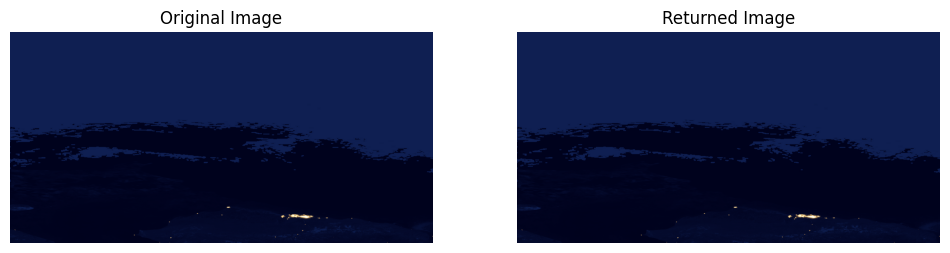

Original image size: 68350554 bytes
Returned image size: 68350554 bytes


In [35]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Display the original image
original_image = input("Please enter the original image filename: ")
original_img = Image.open(original_image)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title('Original Image')
plt.axis('off')

# Display the decompressed image
decompressed_img = Image.open('mpi_output.bmp')
plt.subplot(1, 2, 2)
plt.imshow(decompressed_img)
plt.title('Returned Image')
plt.axis('off')

plt.show()

# Print the size of the original and compressed images
original_file_size = os.path.getsize(original_image)
decompressed_file_size = os.path.getsize('mpi_output.bmp')
print(f"Original image size: {original_file_size} bytes")
print(f"Returned image size: {decompressed_file_size} bytes")

In [36]:
!g++ compare_images.cpp -o compare_images `pkg-config --cflags --libs opencv4`

###**g) Comparing Similarity of Images**

In [37]:
!./compare_images testimg.bmp mpi_output.bmp

MSE: 0.0155246
[ WARN:0] global ./modules/core/src/matrix_expressions.cpp (1333) assign OpenCV/MatExpr: processing of multi-channel arrays might be changed in the future: https://github.com/opencv/opencv/issues/16739
[ WARN:0] global ./modules/core/src/matrix_expressions.cpp (1325) assign OpenCV/MatExpr: processing of multi-channel arrays might be changed in the future: https://github.com/opencv/opencv/issues/16739
SSIM: 0.999729


In [38]:
%%writefile compare_file_sizes.cpp
#include <iostream>
#include <filesystem>
#include <vector>

int main() {
    std::string directory = ".";
    std::vector<std::string> filenames;
    long totalCompressedSize = 0;

    // Iterate through the files in the directory
    for (const auto& entry : std::filesystem::directory_iterator(directory)) {
        if (entry.is_regular_file()) {
            std::string filename = entry.path().filename().string();
            // Check if the filename starts with "mpi_channel_"
            if (filename.rfind("mpi_channel_", 0) == 0) {  // Check if the prefix matches
                filenames.push_back(entry.path().string());
                totalCompressedSize += std::filesystem::file_size(entry.path());  // Get file size directly
            }
        }
    }

    // Get the size of the decompressed output file
    std::string originalFile = "testimg.bmp";
    long originalSize = std::filesystem::file_size(originalFile);  // Get file size directly

    // Check for errors
    if (totalCompressedSize == 0 || originalSize == 0) {
        std::cerr << "Error: Unable to determine file sizes.\n";
        return -1;
    }

    // Output the sizes
    std::cout << "Size of compressed: " << totalCompressedSize << " bytes\n";
    std::cout << "Size of original: " << originalSize << " bytes\n";

    // Calculate the compression ratio
    double compressionRatio = static_cast<double>(originalSize) / totalCompressedSize;
    std::cout << "Compression Ratio: " << compressionRatio << ":1\n";

    return 0;
}


Overwriting compare_file_sizes.cpp


In [39]:
!g++ compare_file_sizes.cpp -o compare_file_sizes
!./compare_file_sizes

Size of compressed: 5624856 bytes
Size of original: 68350554 bytes
Compression Ratio: 12.1515:1


<hr/>

##**5. Comparing all 4 Images Produced**

**This compares the output images of each of the 4 implementations above to determine their similarities in terms of MSE and SSIM (verification code)**

In [40]:
%%writefile compare4.cpp
#include <opencv2/opencv.hpp>
#include <opencv2/imgproc/imgproc.hpp>
#include <opencv2/highgui/highgui.hpp>
#include <opencv2/core/core.hpp>
#include <iostream>
#include <string>

// Function to compute Mean Squared Error (MSE) between two images
double computeMSE(const cv::Mat& imageA, const cv::Mat& imageB) {
    cv::Mat s1;
    cv::absdiff(imageA, imageB, s1);  // |imageA - imageB|
    s1.convertTo(s1, CV_32F);         // convert to float type
    s1 = s1.mul(s1);                  // square each element

    cv::Scalar s = cv::sum(s1);       // sum all elements
    double mse = s.val[0] / (double)(imageA.total());

    return mse;
}

// Function to compute Structural Similarity Index (SSIM)
double computeSSIM(const cv::Mat& imageA, const cv::Mat& imageB) {
    cv::Mat img1, img2;
    imageA.convertTo(img1, CV_32F);
    imageB.convertTo(img2, CV_32F);

    cv::Mat img1_sq = img1.mul(img1);
    cv::Mat img2_sq = img2.mul(img2);
    cv::Mat img1_img2 = img1.mul(img2);

    cv::Mat mu1, mu2;
    cv::GaussianBlur(img1, mu1, cv::Size(11, 11), 1.5);
    cv::GaussianBlur(img2, mu2, cv::Size(11, 11), 1.5);

    cv::Mat mu1_sq = mu1.mul(mu1);
    cv::Mat mu2_sq = mu2.mul(mu2);
    cv::Mat mu1_mu2 = mu1.mul(mu2);

    cv::Mat sigma1_sq, sigma2_sq, sigma12;
    cv::GaussianBlur(img1_sq, sigma1_sq, cv::Size(11, 11), 1.5);
    cv::GaussianBlur(img2_sq, sigma2_sq, cv::Size(11, 11), 1.5);
    cv::GaussianBlur(img1_img2, sigma12, cv::Size(11, 11), 1.5);

    sigma1_sq -= mu1_sq;
    sigma2_sq -= mu2_sq;
    sigma12 -= mu1_mu2;

    const double C1 = 6.5025, C2 = 58.5225;
    cv::Mat t1, t2, t3;
    t1 = 2 * mu1_mu2 + C1;
    t2 = 2 * sigma12 + C2;
    t3 = t1.mul(t2);

    t1 = mu1_sq + mu2_sq + C1;
    t2 = sigma1_sq + sigma2_sq + C2;
    t1 = t1.mul(t2);

    cv::Mat ssim_map;
    cv::divide(t3, t1, ssim_map);
    cv::Scalar ssim = cv::mean(ssim_map);
    return ssim.val[0];
}

// Function to compare two images using both MSE and SSIM
void compareImages(const cv::Mat& imageA, const cv::Mat& imageB) {
    double mseValue = computeMSE(imageA, imageB);
    double ssimValue = computeSSIM(imageA, imageB);

    std::cout << "MSE: " << mseValue << ", SSIM: " << ssimValue << std::endl;
}

int main() {
    // Paths to your images
    std::string imagePaths[] = { "serial_output.bmp", "openmp_output.bmp", "cuda_output.bmp", "mpi_output.bmp" };

    cv::Mat images[4];

    // Load the images
    for (int i = 0; i < 4; i++) {
        images[i] = cv::imread(imagePaths[i]);
        if (images[i].empty()) {
            std::cerr << "Error: Could not load image " << imagePaths[i] << std::endl;
            return -1;
        }
    }

    // Convert all images to grayscale
    cv::Mat grayImages[4];
    for (int i = 0; i < 4; i++) {
        cv::cvtColor(images[i], grayImages[i], cv::COLOR_BGR2GRAY);
    }

    // // Compare all pairs of images
    // for (int i = 0; i < 4; i++) {
    //     for (int j = i + 1; j < 4; j++) {
    //         std::cout << "Comparing Image " << i + 1 << " and Image " << j + 1 << ":" << std::endl;
    //         compareImages(grayImages[i], grayImages[j]);
    //         std::cout << std::endl;
    //     }
    // }
    // Compare all pairs of images without converting to grayscale
    for (int i = 0; i < 4; i++) {
        for (int j = i + 1; j < 4; j++) {
            std::cout << "Comparing Image " << i + 1 << " and Image " << j + 1 << ":" << std::endl;
            compareImages(images[i], images[j]);
            std::cout << std::endl;
        }
    }

    return 0;
}


Writing compare4.cpp


In [41]:
!g++ -o compare4 compare4.cpp `pkg-config --cflags --libs opencv4`

In [42]:
!./compare4

Comparing Image 1 and Image 2:
[ WARN:0] global ./modules/core/src/matrix_expressions.cpp (1333) assign OpenCV/MatExpr: processing of multi-channel arrays might be changed in the future: https://github.com/opencv/opencv/issues/16739
[ WARN:0] global ./modules/core/src/matrix_expressions.cpp (1325) assign OpenCV/MatExpr: processing of multi-channel arrays might be changed in the future: https://github.com/opencv/opencv/issues/16739
MSE: 6.58436e-07, SSIM: 1

Comparing Image 1 and Image 3:
MSE: 0.00263778, SSIM: 0.999966

Comparing Image 1 and Image 4:
MSE: 6.58436e-07, SSIM: 1

Comparing Image 2 and Image 3:
MSE: 0.002638, SSIM: 0.999966

Comparing Image 2 and Image 4:
MSE: 0, SSIM: 1

Comparing Image 3 and Image 4:
MSE: 0.002638, SSIM: 0.999966



**This compares the time taken by each of the 4 implementations. This allows the visualization of the time differences.**

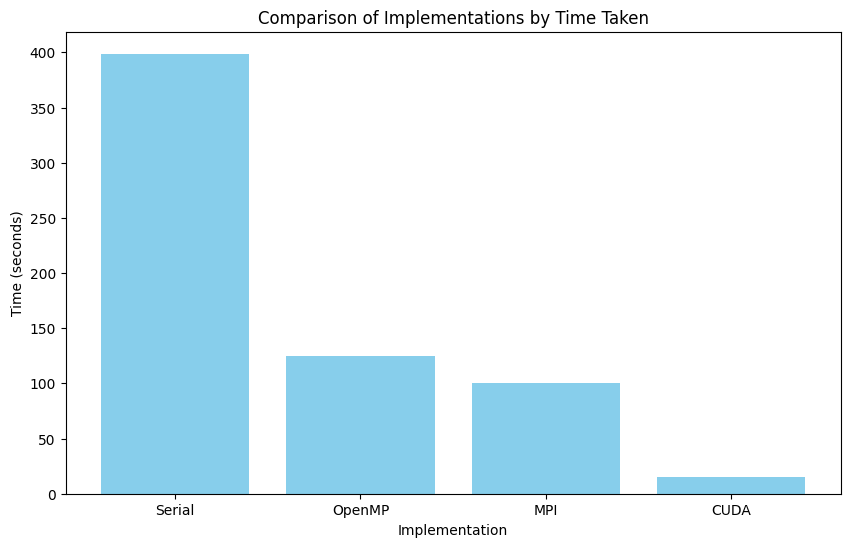

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the CSV files into pandas DataFrames
df_serial = pd.read_csv('/content/compression_times.csv', header=None, names=['Method', 'Time'])
df_openmp = pd.read_csv('/content/OpenMPcompression_times.csv', header=None, names=['Method', 'Time'])
df_mpi = pd.read_csv('/content/MPIcompression_times.csv', header=None, names=['Method', 'Time', 'Size'])  # Load MPI with an extra column
df_cuda = pd.read_csv('/content/CUDAcompression_times.csv', header=None, names=['Method', 'GPUTime', 'Time'])

# Step 2: Convert 'Time' column to numeric for serial, openmp and cuda
df_serial['Time'] = pd.to_numeric(df_serial['Time'], errors='coerce')
df_openmp['Time'] = pd.to_numeric(df_openmp['Time'], errors='coerce')
df_cuda['Time'] = pd.to_numeric(df_cuda['Time'], errors='coerce')

# Step 3: Extract the time from the MPI 'Time' column (handle the extra column)
df_mpi['Time'] = pd.to_numeric(df_mpi['Time'], errors='coerce')  # Convert the Time column to numeric

# Step 4: Convert milliseconds to seconds (if needed)
df_serial['Time'] = df_serial['Time'] / 1000
df_openmp['Time'] = df_openmp['Time'] / 1000
df_mpi['Time'] = df_mpi['Time'] / 1000
df_cuda['Time'] = df_cuda['Time'] / 1000

# Step 5: Combine the DataFrames into one DataFrame
#df_combined = pd.concat([df_serial[['Method', 'Time']], df_openmp[['Method', 'Time']], df_mpi[['Method', 'Time']]], ignore_index=True)
df_combined = pd.concat([df_serial[['Method', 'Time']], df_openmp[['Method', 'Time']], df_mpi[['Method', 'Time']], df_cuda[['Method', 'Time']]], ignore_index=True)

# Ensure that the 'Method' column contains only strings
df_combined['Method'] = df_combined['Method'].astype(str)

# Step 6: Create a bar graph for the combined data
plt.figure(figsize=(10,6))
plt.bar(df_combined['Method'], df_combined['Time'], color='skyblue')

# Step 7: Add labels and title
plt.xlabel('Implementation')
plt.ylabel('Time (seconds)')
plt.title('Comparison of Implementations by Time Taken')

# Step 8: Display the graph
plt.show()


**This section computes the speedup provided by each of the 3 implementations and provides the visualization.**

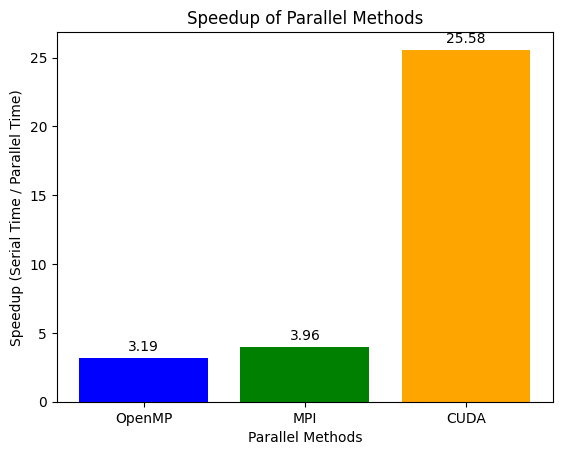

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV files
df_serial = pd.read_csv('/content/compression_times.csv', header=None, names=['Method', 'Time'])
df_openmp = pd.read_csv('/content/OpenMPcompression_times.csv', header=None, names=['Method', 'Time'])
df_mpi = pd.read_csv('/content/MPIcompression_times.csv', header=None, names=['Method', 'Time', 'Size'])
df_cuda = pd.read_csv('/content/CUDAcompression_times.csv', header=None, names=['Method', 'GPUTime', 'Time'])

# Read the first time value from each dataframe
time_serial = df_serial['Time'].iloc[0]
time_openmp = df_openmp['Time'].iloc[0]
time_mpi = df_mpi['Time'].iloc[0]
time_cuda = df_cuda['Time'].iloc[0]

# Calculate speedup by dividing serial time by each method's time
speedup_openmp = time_serial / time_openmp
speedup_mpi = time_serial / time_mpi
speedup_cuda = time_serial / time_cuda

# Create a dictionary for plotting
speedup_data = {
    'OpenMP': speedup_openmp,
    'MPI': speedup_mpi,
    'CUDA': speedup_cuda
}

# Plot the results
methods = list(speedup_data.keys())
speedups = list(speedup_data.values())

fig, ax = plt.subplots()
bars = ax.bar(methods, speedups, color=['blue', 'green', 'orange'])
ax.set_xlabel('Parallel Methods')
ax.set_ylabel('Speedup (Serial Time / Parallel Time)')
ax.set_title('Speedup of Parallel Methods')

# Add speedup values on the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',  # Format the speedup value
                xy=(bar.get_x() + bar.get_width() / 2, height),  # Position of the text
                xytext=(0, 3),  # Offset text slightly above the bar
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


In [45]:
ls -l

total 359888
-rw-r--r-- 1 root root  2291812 Oct  2 16:32 channel_0.bin.xz
-rw-r--r-- 1 root root  1876056 Oct  2 16:34 channel_1.bin.xz
-rw-r--r-- 1 root root  1423644 Oct  2 16:37 channel_2.bin.xz
-rwxr-xr-x 1 root root    35072 Oct  2 16:51 compare4*
-rw-r--r-- 1 root root     3532 Oct  2 16:51 compare4.cpp
-rwxr-xr-x 1 root root    54528 Oct  2 16:51 compare_file_sizes*
-rw-r--r-- 1 root root     1521 Oct  2 16:51 compare_file_sizes.cpp
-rwxr-xr-x 1 root root    34760 Oct  2 16:51 compare_images*
-rw-r--r-- 1 root root     2477 Oct  2 16:31 compare_images.cpp
-rwxr-xr-x 1 root root   218720 Oct  2 16:47 compress_image*
-rw-r--r-- 1 root root    21222 Oct  2 16:47 compress_image.cpp
-rw-r--r-- 1 root root       14 Oct  2 16:38 compression_times.csv
-rw-r--r-- 1 root root  2341916 Oct  2 16:44 cuda_channel_0.bin.xz
-rw-r--r-- 1 root root  1904748 Oct  2 16:44 cuda_channel_1.bin.xz
-rw-r--r-- 1 root root  1433476 Oct  2 16:44 cuda_channel_2.bin.xz
-rw-r--r-- 1 root root       19 Oct  